## Project task: Temperature Forecasting (Final Project)

The scope of this project is to make prediction on hourly “Temperature” based on the prior 24 hours data from the weather conditions dataset recorded at the weather station at the Max Planck Institute for Biogeochemistry in Jena, Germany, over several years. The dataset is structured in hourly based from 01-01-2009 to 01-01-2017. This predictive model is built in iPython environment with Recurrent Neural Network libraries, Keras and LSTM.

### Contents
- I. Import data and Data Cleaning
- II. Exploratory Data Analysis (EDA) and Visualization
 - Temperature Hypotheses Test (T(degC))
 - Correlation plot
 - Distribution plot
- III. Data Normalization and Transformation
 - Time Series format
- IV. Modeling and Forecasting
 - LSTM modeling
 - Model comparision
 - Forecast performance discussion and visualization
 - Final model determination
- V. Export Prediction for Kaggle Submission 

# I. Import data and Data Cleaning
### Load dataset for EDA

In [8]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/climate_hour.csv")
print(df.shape)
display(df.head(5))

(70037, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


### Time Stamp range

In [3]:
print("Time stamp range is %s - %s" %(df["Date Time"].iloc[0],df["Date Time"].iloc[-1] ))

Time stamp range is 01.01.2009 01:00:00 - 01.01.2017 00:00:00


### Use "Date Time" Columns as Table index for Plotting

In [4]:
edaDf=df.copy()
date_time=list(pd.to_datetime(list(map(lambda x:x.replace("_"," "), edaDf["Date Time"]))))
edaDf["Date Time"] = date_time 
edaDf.set_index("Date Time", inplace=True)

In [5]:
edaDf.head(5)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


### Missing Values Check for ALL attributes

- No Missing value found from Dataset

In [6]:
edaDf.isna().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

# II. Exploratory Data Analysis (EDA) and Visualization

### Mean Degree C in 24 hours

- As we see below graph the mean deg varies over time, the maximum temperature is about 12.5-13.0 degC at around hour=15:00 and the minimun temperature is about 6.2-6.5 degC at around hour=05:00. At this point, we could not conclude whether this is a true assumption, further statistical test should be done to verify.

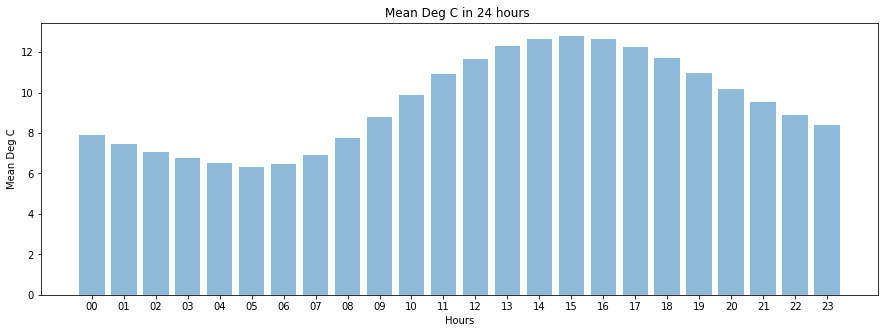

In [9]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t

corrDf = corrDf.groupby("Date Time")["T (degC)"].mean()
corrDf =pd.DataFrame(corrDf)


x_labels = corrDf.index
y_pos = np.arange(len(x_labels))
performance = corrDf["T (degC)"]
plt.figure(figsize=(15,5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Mean Deg C')
plt.xlabel("Hours")
plt.title('Mean Deg C in 24 hours ')
plt.show()

### Statistical Hypotheses

- According to the following hypotheses testing with 95% C.I., we could conclude that the highest temperature happens at 15:00 in range 12.792 - 12.804 degC; Similarly, the lowest temperature happens at 05:00 in range 6.330 - 6.340 degC. With this information, we could pay more attention to the prediction in the M.L. process.

In [10]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="14"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

12.638424117848578
Number of Samples per Trail (Degree of Freedom:): 2919
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 12.64113832997616
Std of Bootstrapped Samples: 0.16592032103353482
Confidence Interval is 12.635 - 12.647


In [11]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="15"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

12.79688591983556
Number of Samples per Trail (Degree of Freedom:): 2919
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 12.799016085912651
Std of Bootstrapped Samples: 0.1677058018869883
Confidence Interval is 12.793 - 12.805


In [12]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="16"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

12.631455978074683
Number of Samples per Trail (Degree of Freedom:): 2919
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 12.629606259493947
Std of Bootstrapped Samples: 0.16670527747932748
Confidence Interval is 12.624 - 12.636


In [13]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="04"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

6.491326250856752
Number of Samples per Trail (Degree of Freedom:): 2918
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 6.491210900083197
Std of Bootstrapped Samples: 0.12347949427600068
Confidence Interval is 6.487 - 6.496


In [14]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="05"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

6.3385195339273475
Number of Samples per Trail (Degree of Freedom:): 2918
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 6.335699954572809
Std of Bootstrapped Samples: 0.1266709613915748
Confidence Interval is 6.331 - 6.340


In [15]:
corrDf = df.loc[:][["Date Time", "T (degC)"]]
t = [item[-8:-6] for item in corrDf["Date Time"]]
corrDf["Date Time"] = t
degLst = list(corrDf["T (degC)"][corrDf["Date Time"]=="06"])


import random
tempLst = np.array(list(degLst)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
t_stat=1.96
while cnt < len(degLst):# Sampling 100 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1

print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.964/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.96 / np.sqrt(len(bLst)))))

6.462988348183687
Number of Samples per Trail (Degree of Freedom:): 2918
t-statistic (from table): 1.96
Mean of Bootstrapped Samples: 6.460846824864788
Std of Bootstrapped Samples: 0.12921946538978735
Confidence Interval is 6.456 - 6.466


### Correlation Heatmap

- The following shows the correlation between features, we could observe on results of M.L. algorithms and consider to elimate those highly correlated features.
- Paris of features are highly correlated:
 - Tpot vs T(degC): Corr =1
 - sh vs VPdef: Corr =1
 - H2OC vs VPact: Corr =1
 - H2OC vs sh: Corr =1
 


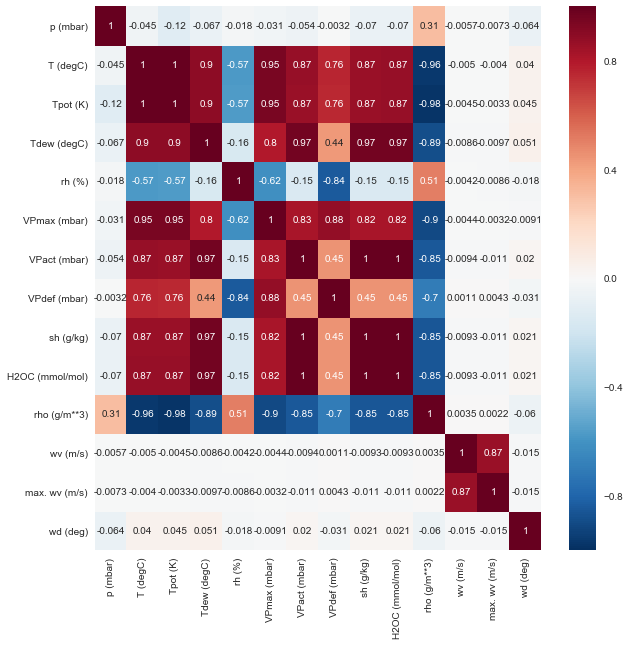

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
ax=sns.heatmap(edaDf.corr(), annot=True)

### Attributes plot vs Time 
- The following is the plots to show how the features changes over time and how the patterns of Target prediction values: T(degC) reacts against other features.
 - Based on the above correlation values, we could obersve that T(degC) are highly correlated with Tdew and Tpot the pattern below match those values.

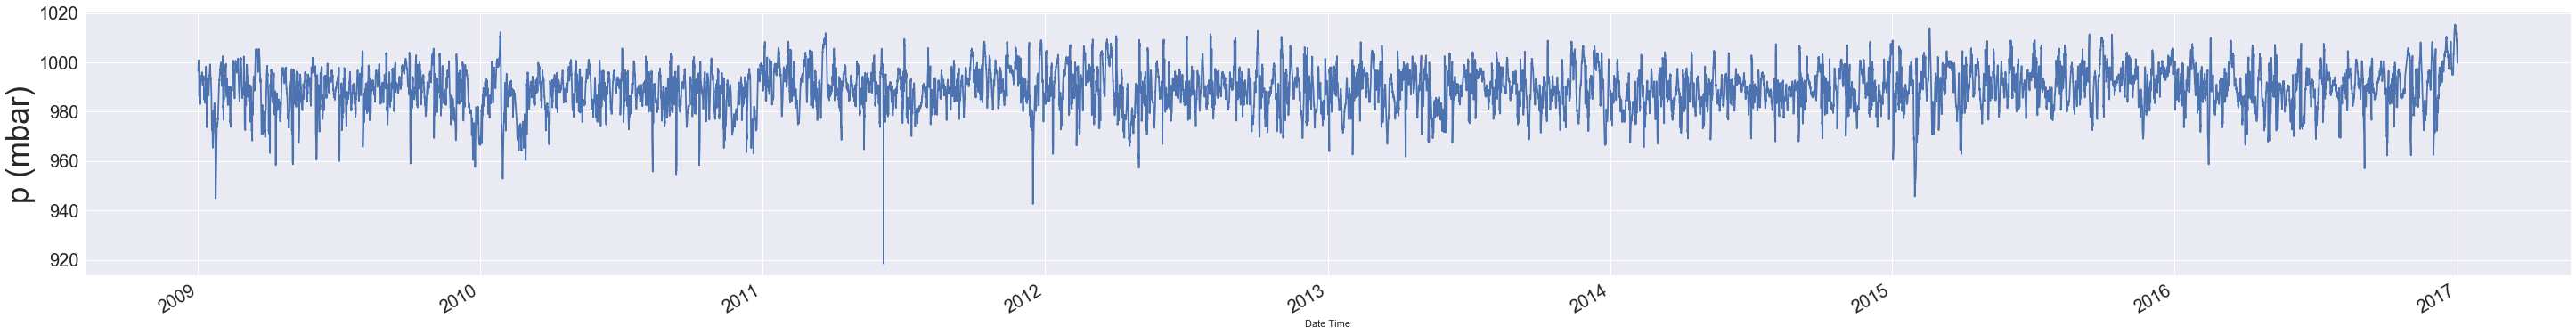

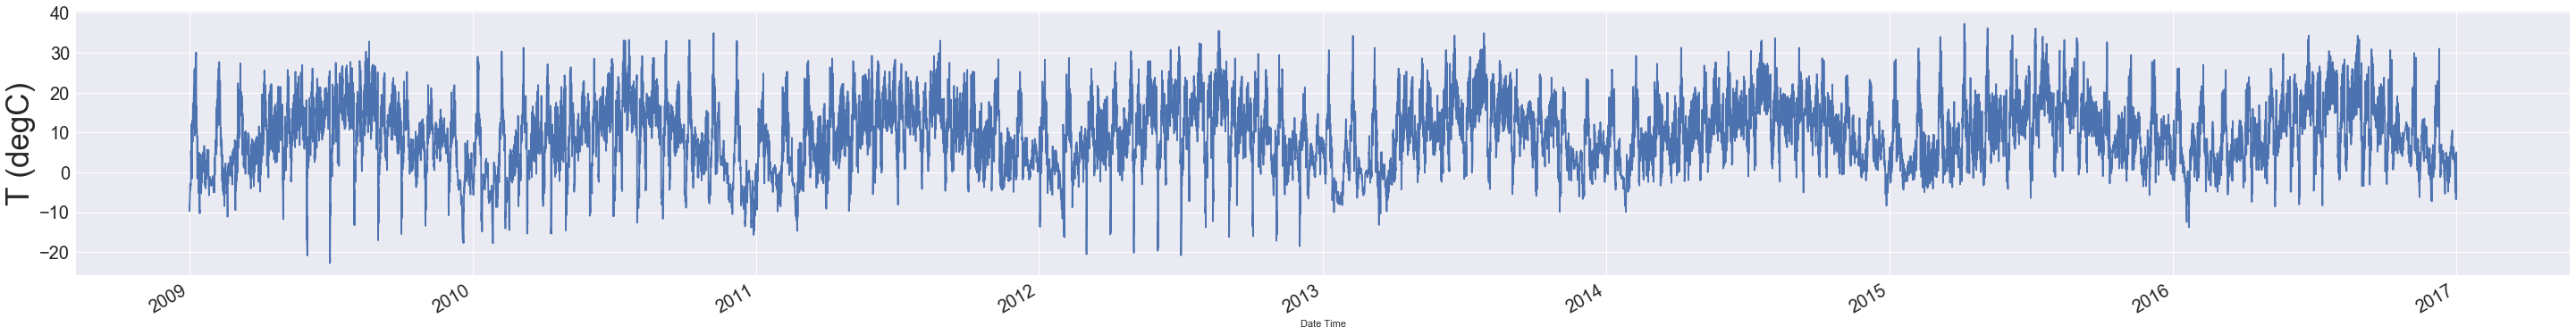

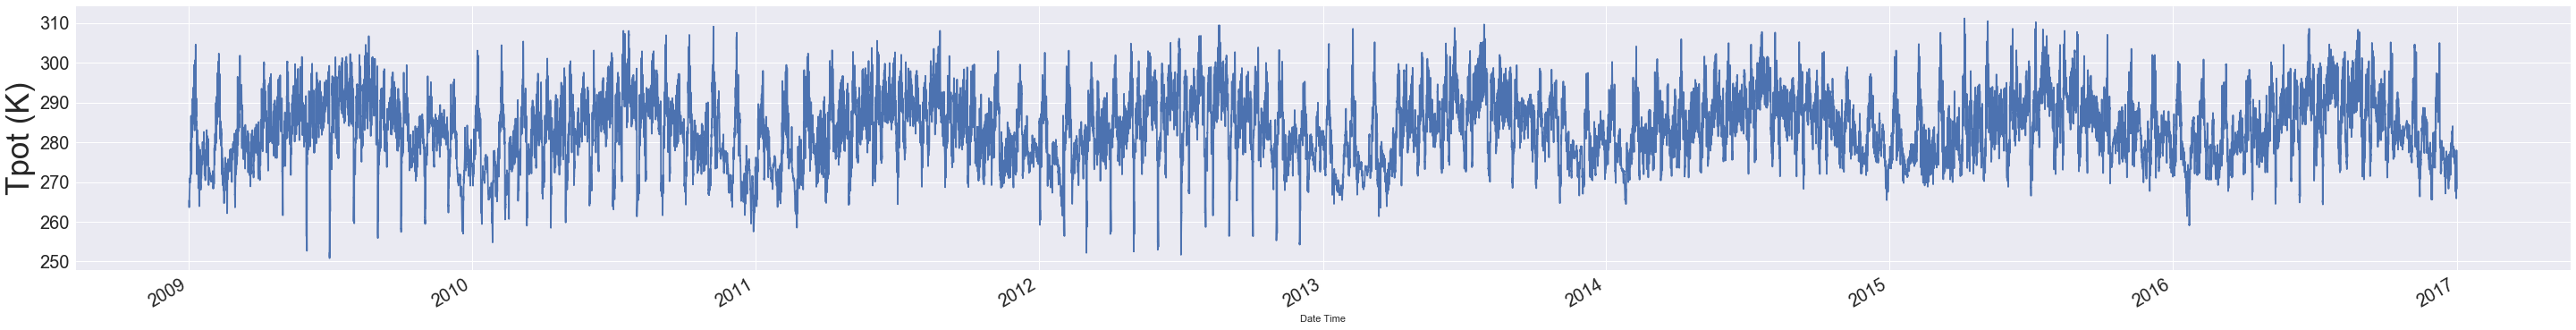

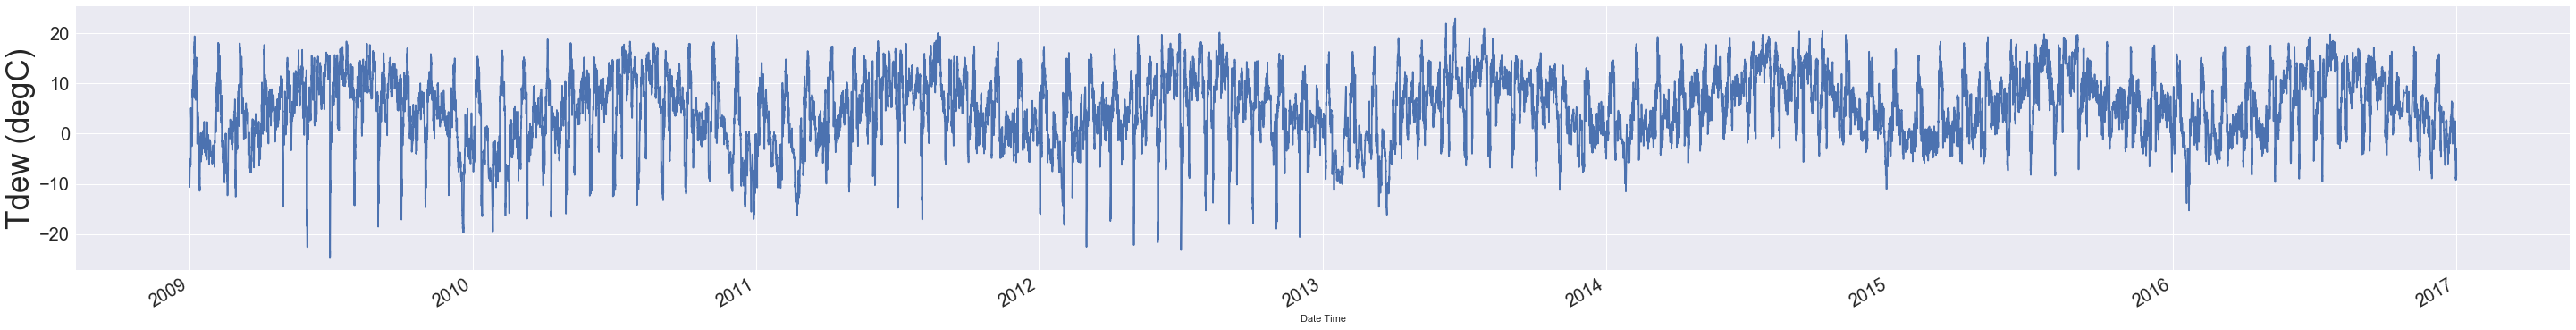

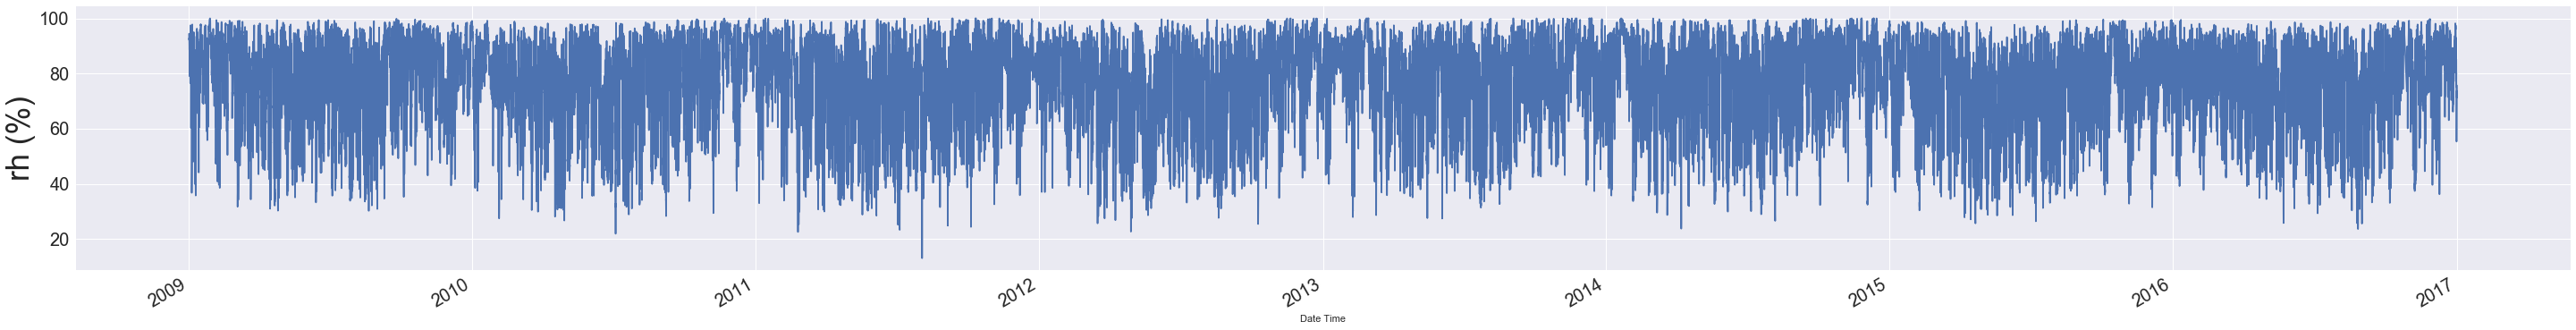

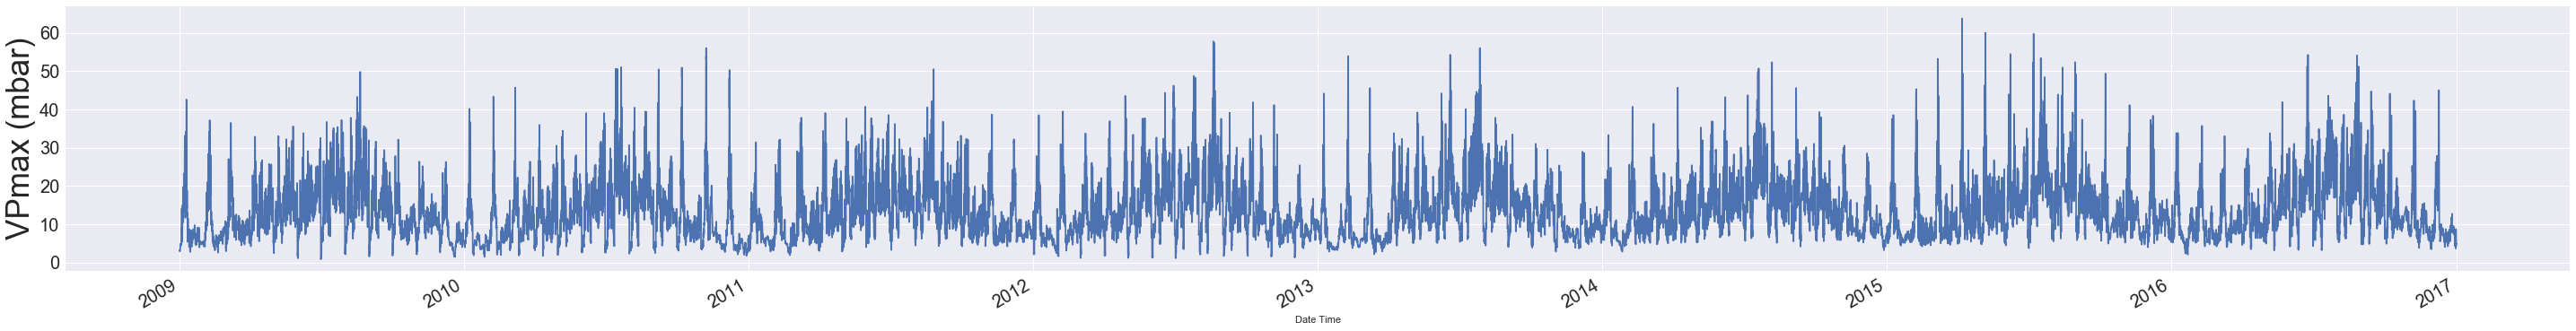

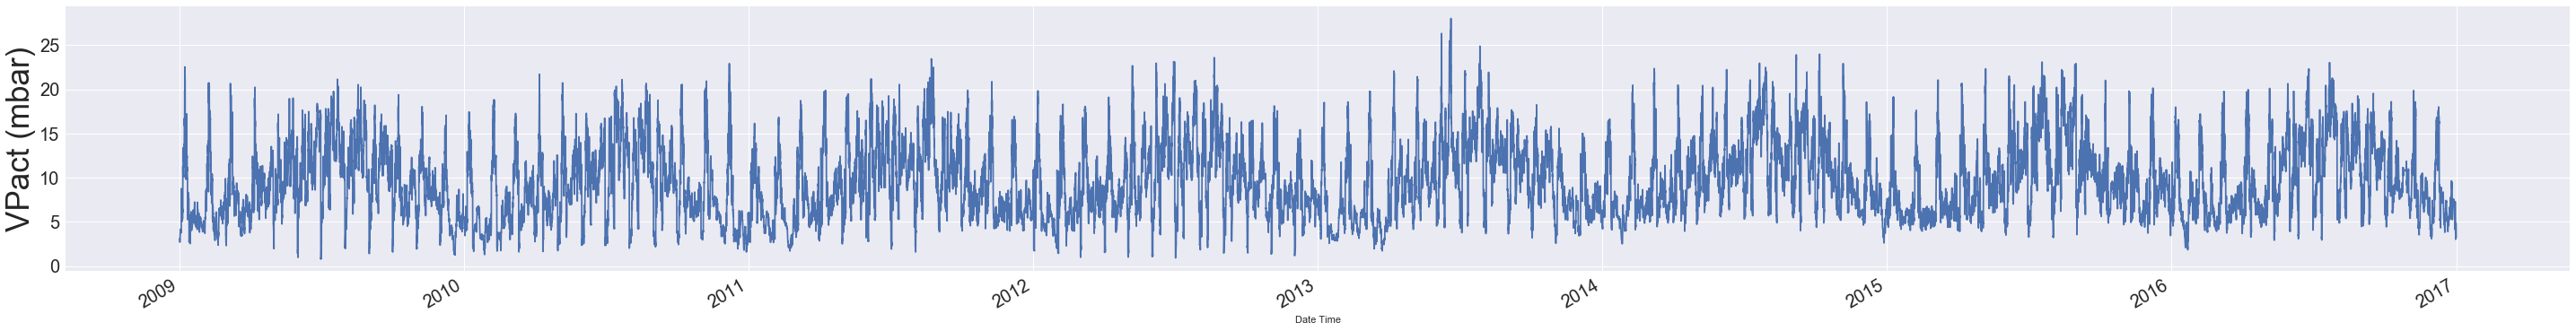

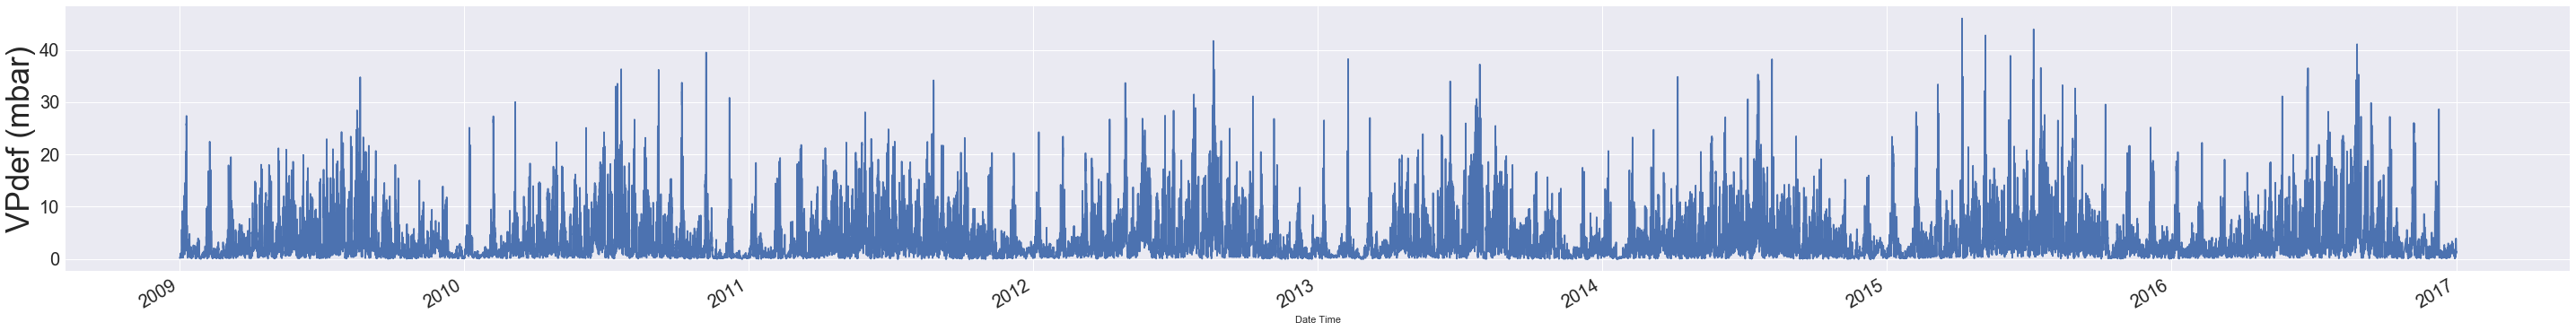

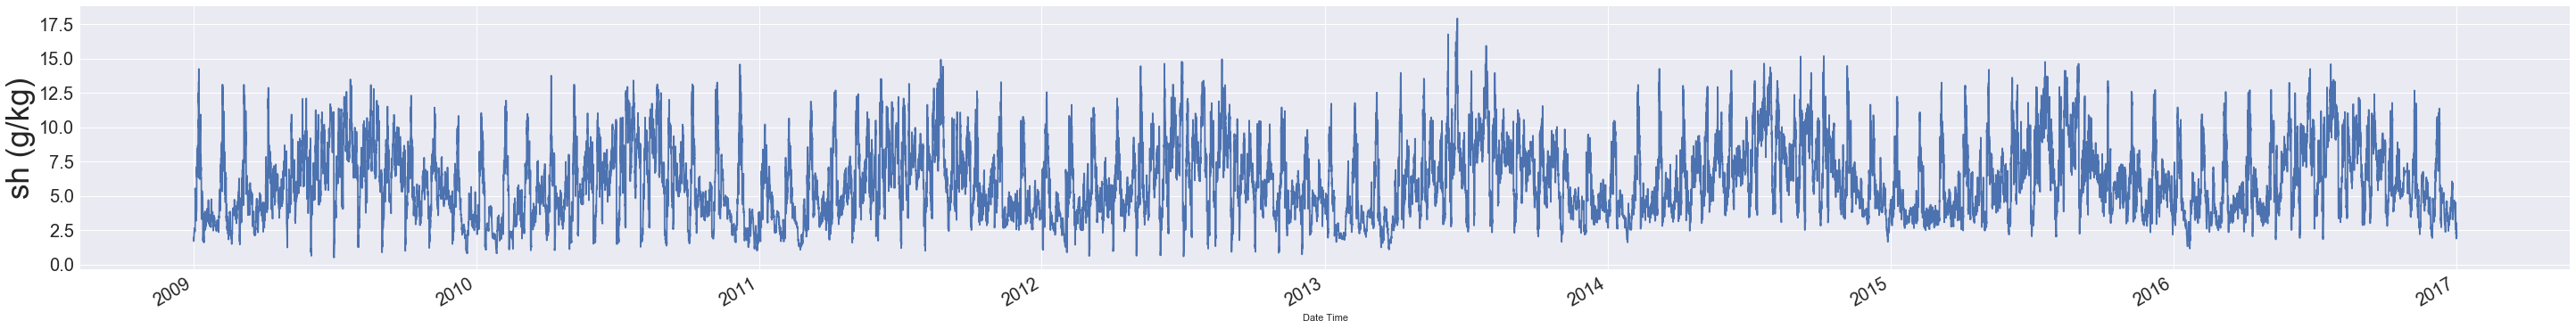

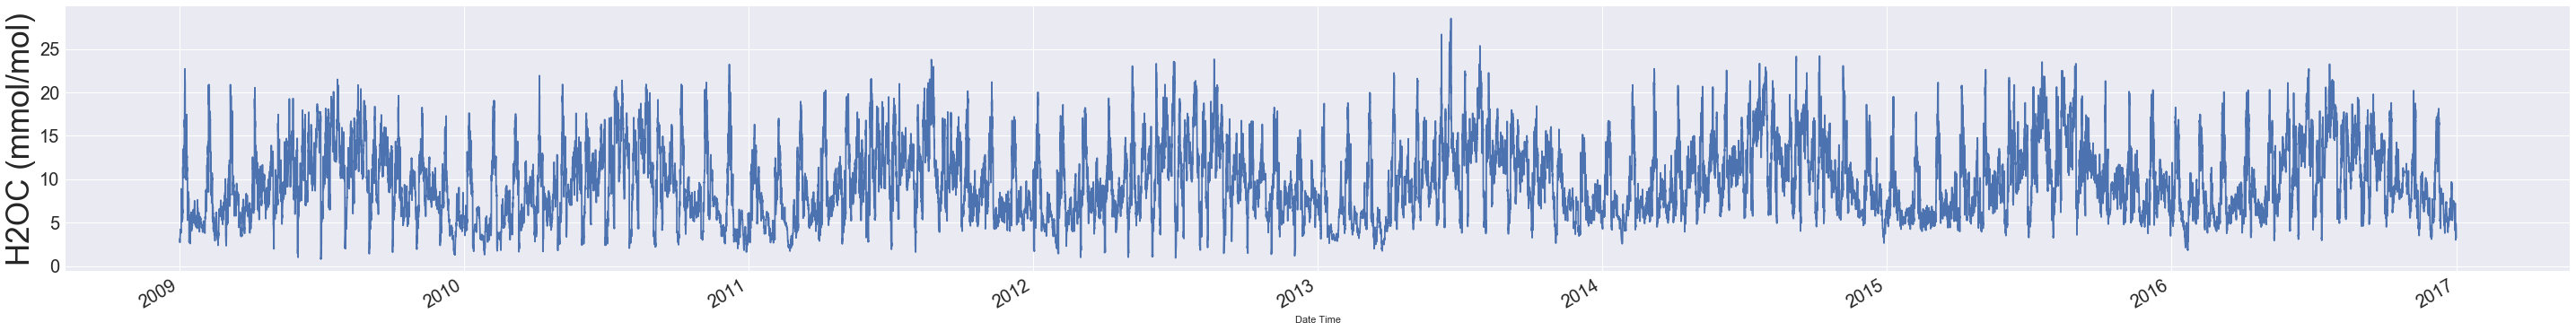

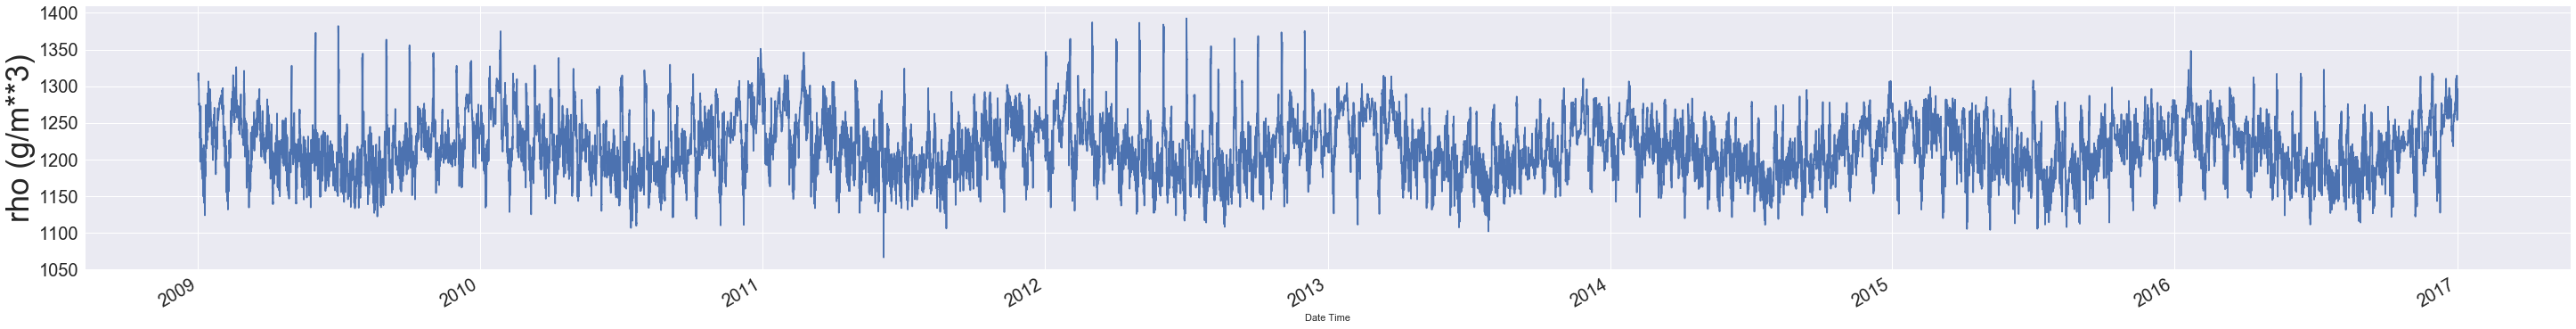

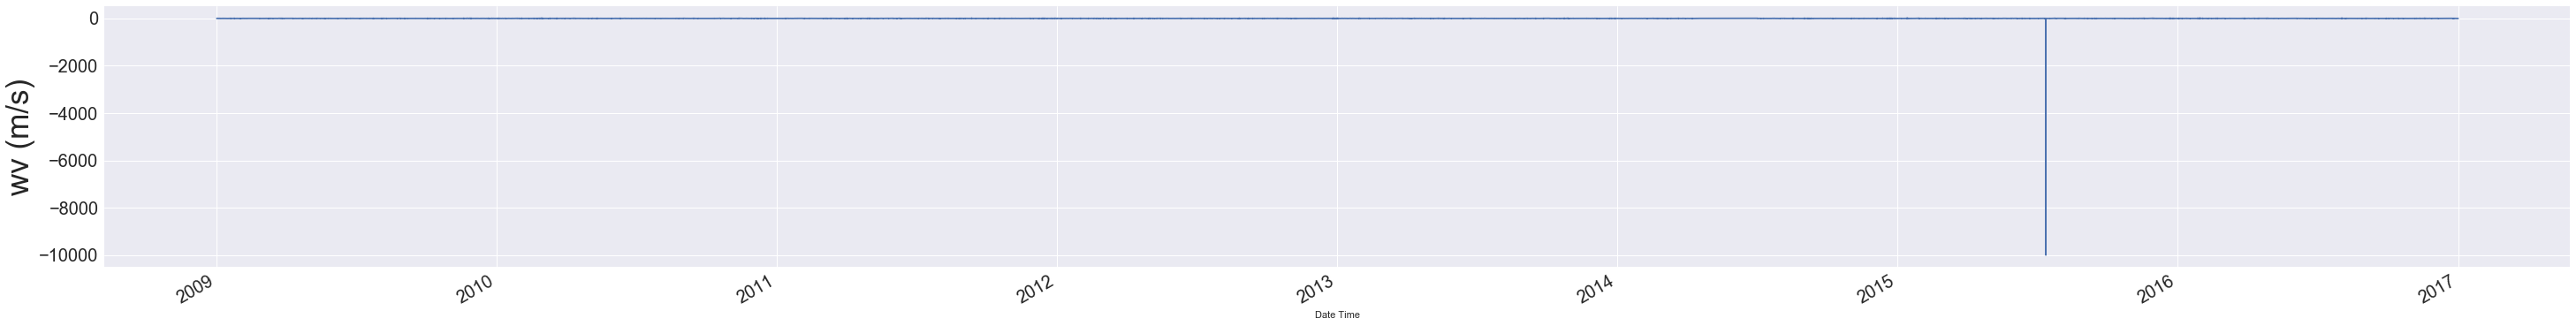

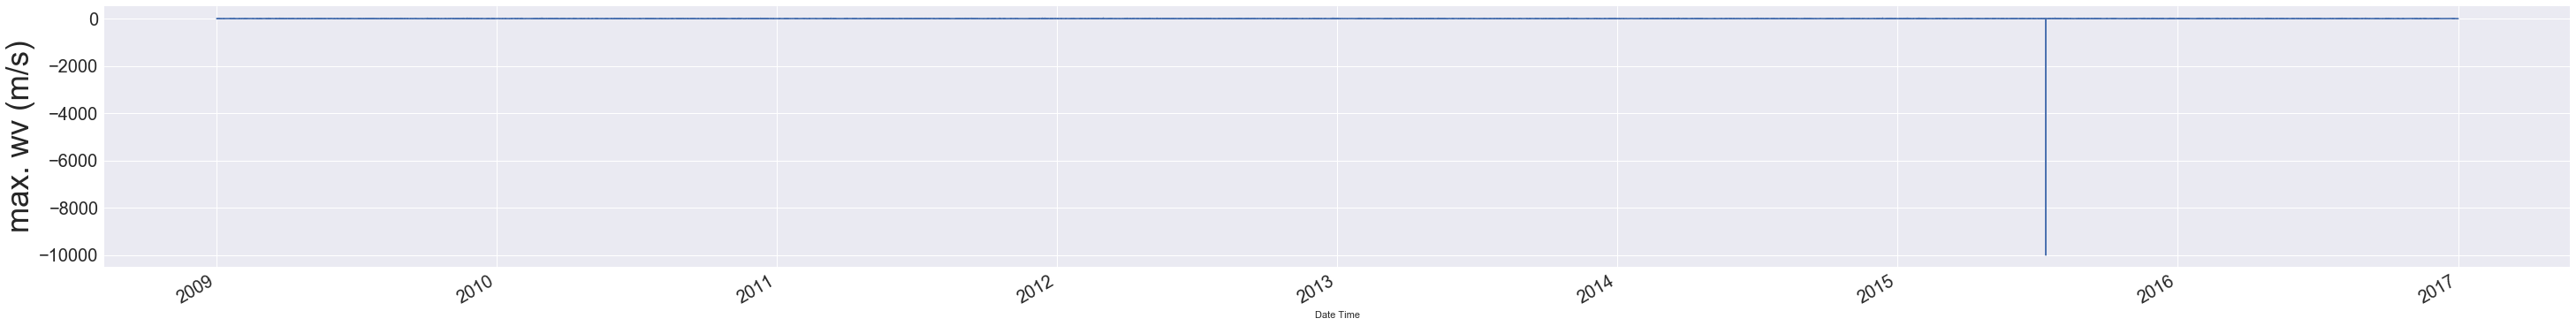

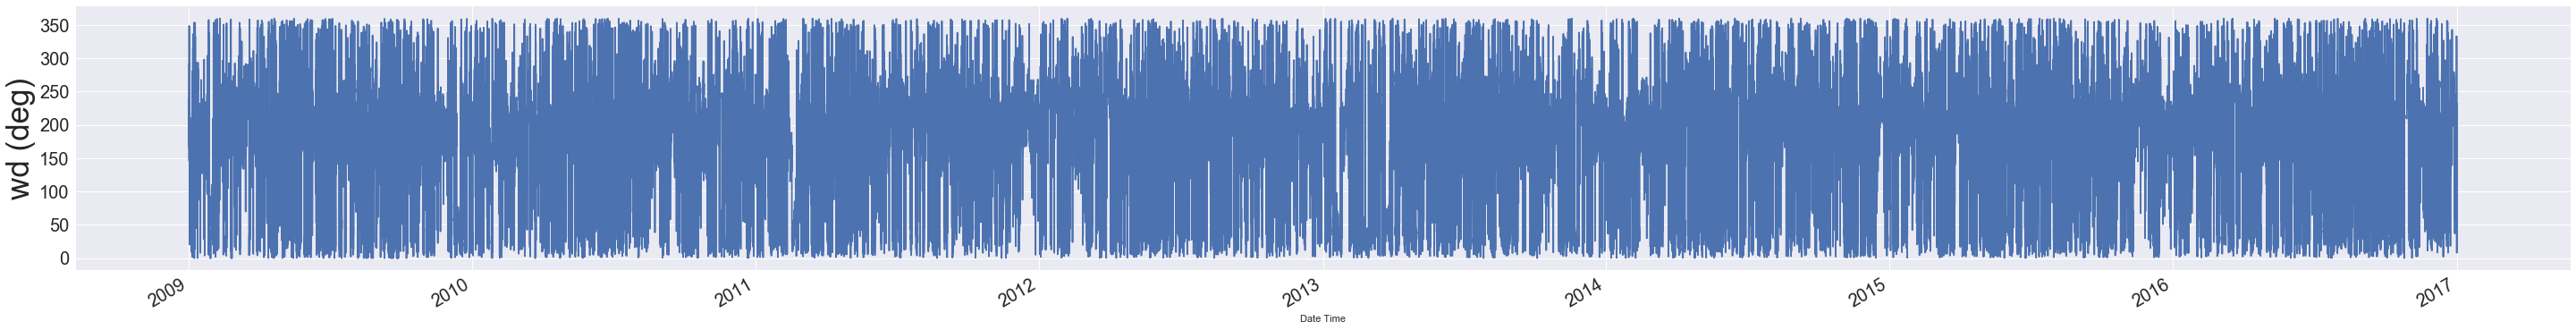

In [17]:
for i,col in enumerate(edaDf.columns):
    plt.figure(figsize=(50,100))
    plt.subplot(14,1,i+1)
    edaDf[col].plot(fontsize=20)
    #plt.legend(fontsize=20)
    plt.ylabel(col, fontsize=35)
    plt.show()

### Check statistic

In [18]:
display(edaDf.describe())

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000,70037.000000
mean,989.214407,9.441694,283.484141,4.953132,76.029050,13.567671,9.532164,4.035420,6.021406,9.638610,1216.101047,1.701543,2.961253,174.943301
std,8.360583,8.420257,8.501338,6.731520,16.457667,7.734023,4.184210,4.890396,2.656194,4.235455,39.964559,65.472610,75.626524,86.619521
min,918.500000,-22.760000,250.850000,-24.800000,13.060000,0.970000,0.810000,0.000000,0.510000,0.810000,1066.190000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.430000,0.230000,65.290000,7.770000,6.210000,0.870000,3.920000,6.290000,1187.560000,0.990000,1.760000,125.500000
50%,989.580000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.180000,5.590000,8.960000,1213.850000,1.760000,2.960000,198.400000
75%,994.730000,15.460000,289.510000,10.070000,89.500000,17.590000,12.350000,5.290000,7.800000,12.480000,1242.850000,2.860000,4.730000,234.300000
max,1015.290000,37.280000,311.210000,22.940000,100.000000,63.770000,28.040000,46.010000,17.940000,28.530000,1392.560000,12.580000,20.330000,360.000000


### Attributes  boxplot
- The plots below show that the distribution of the each features. We could observe that there are outliers in each of features. In this experiment, we are going to save them because we are dealing with time series, so that we want to observe if thereis particular values impact on the target values in particular time period. 

/Users/KevQuant/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


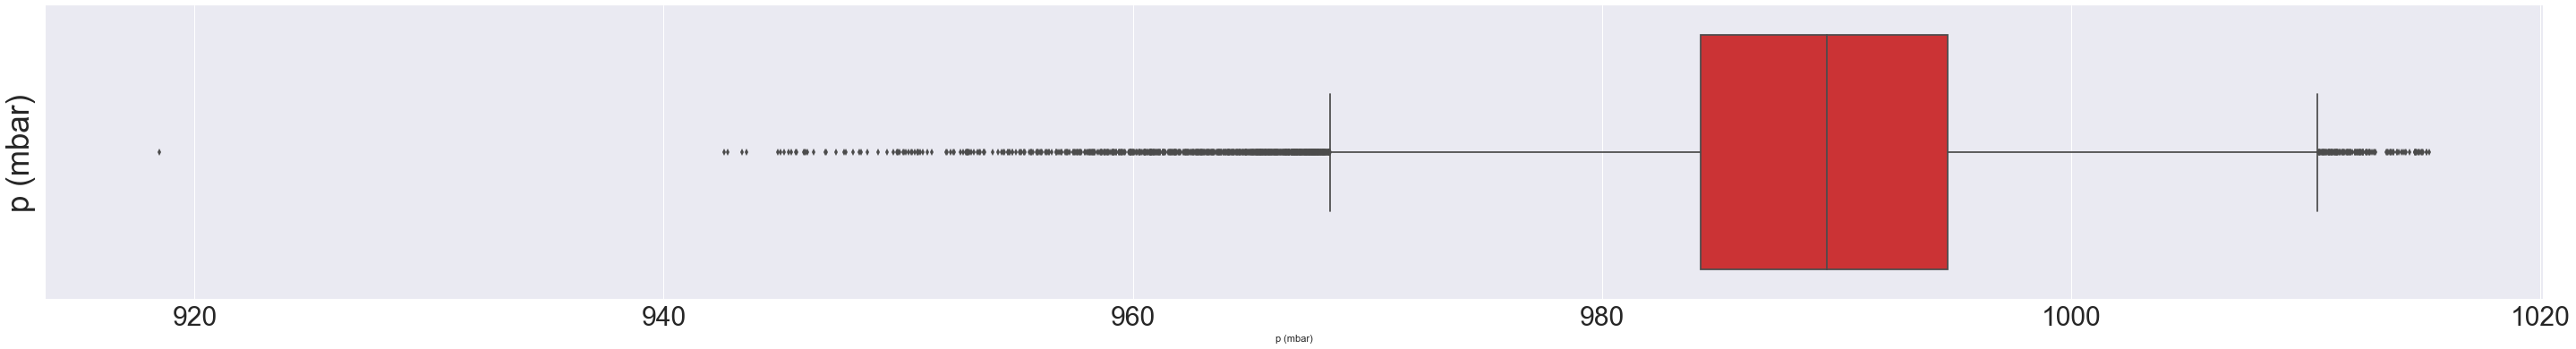

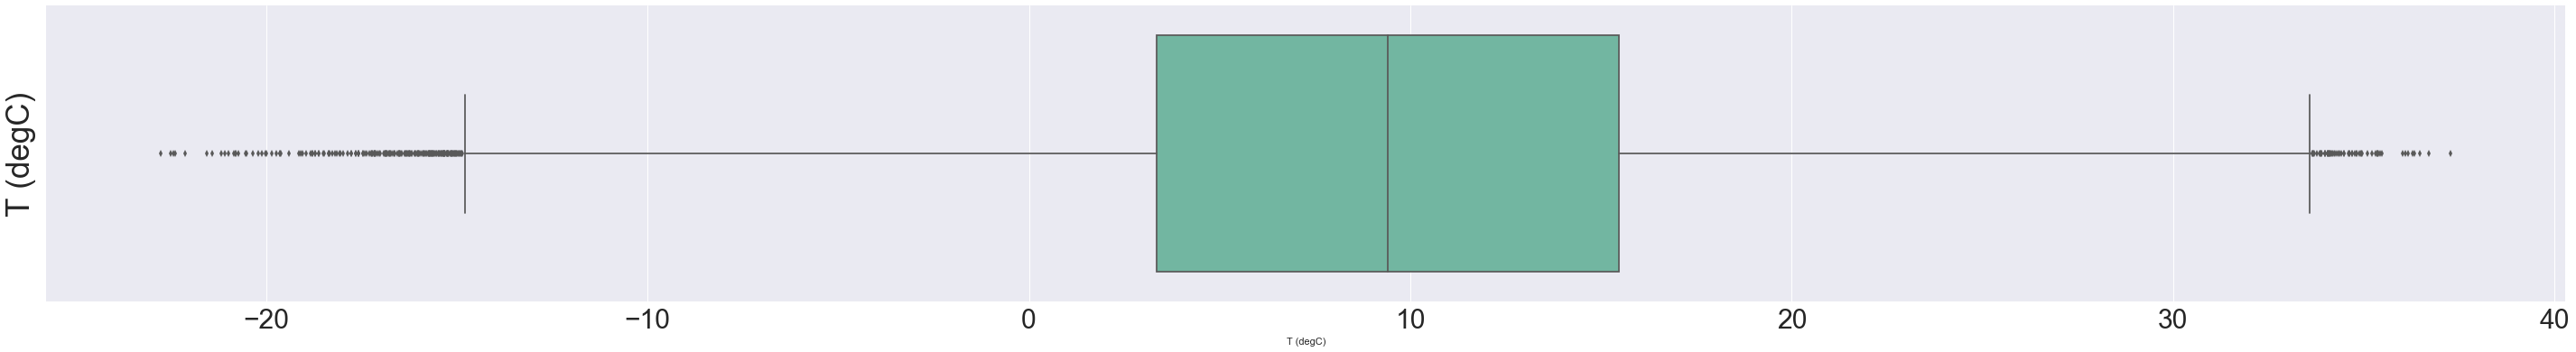

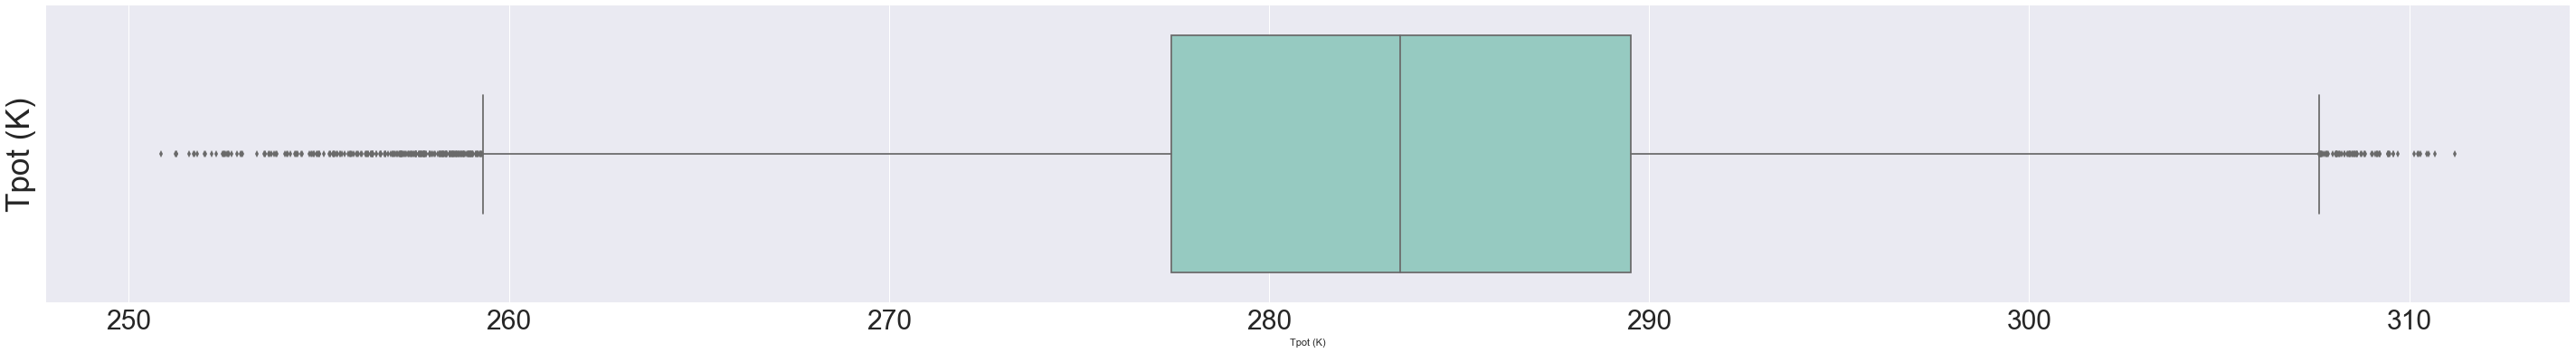

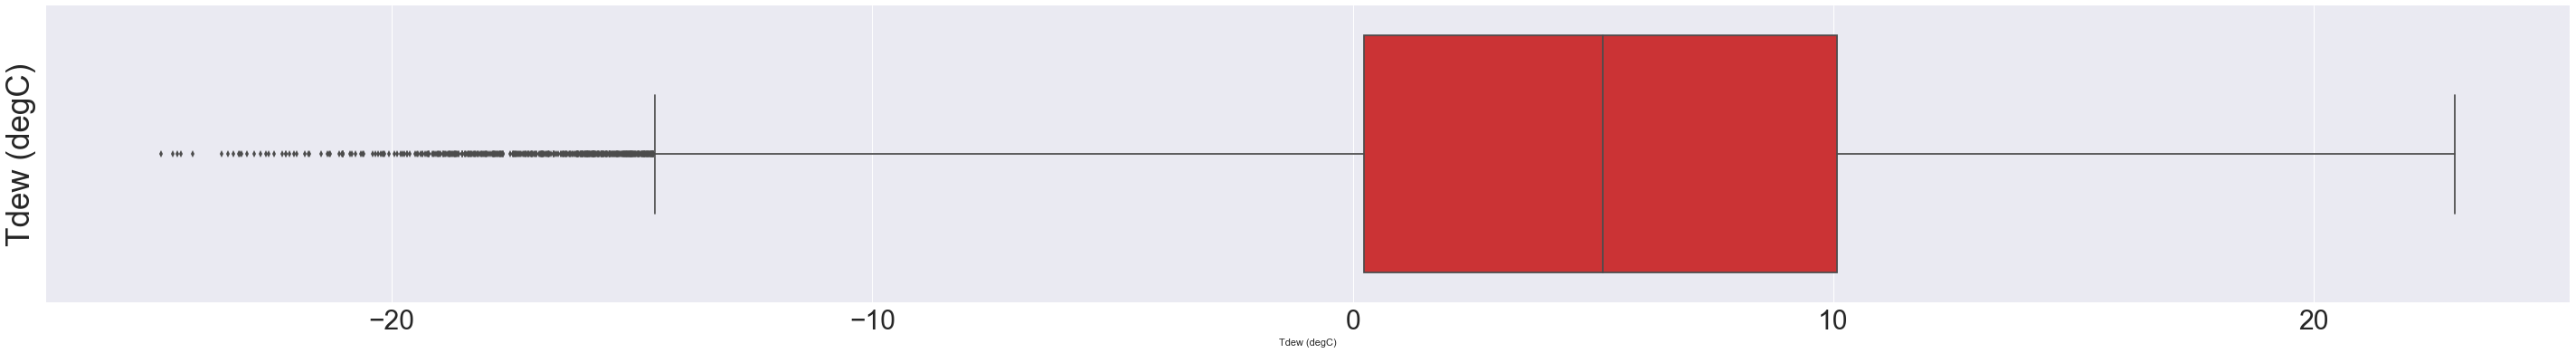

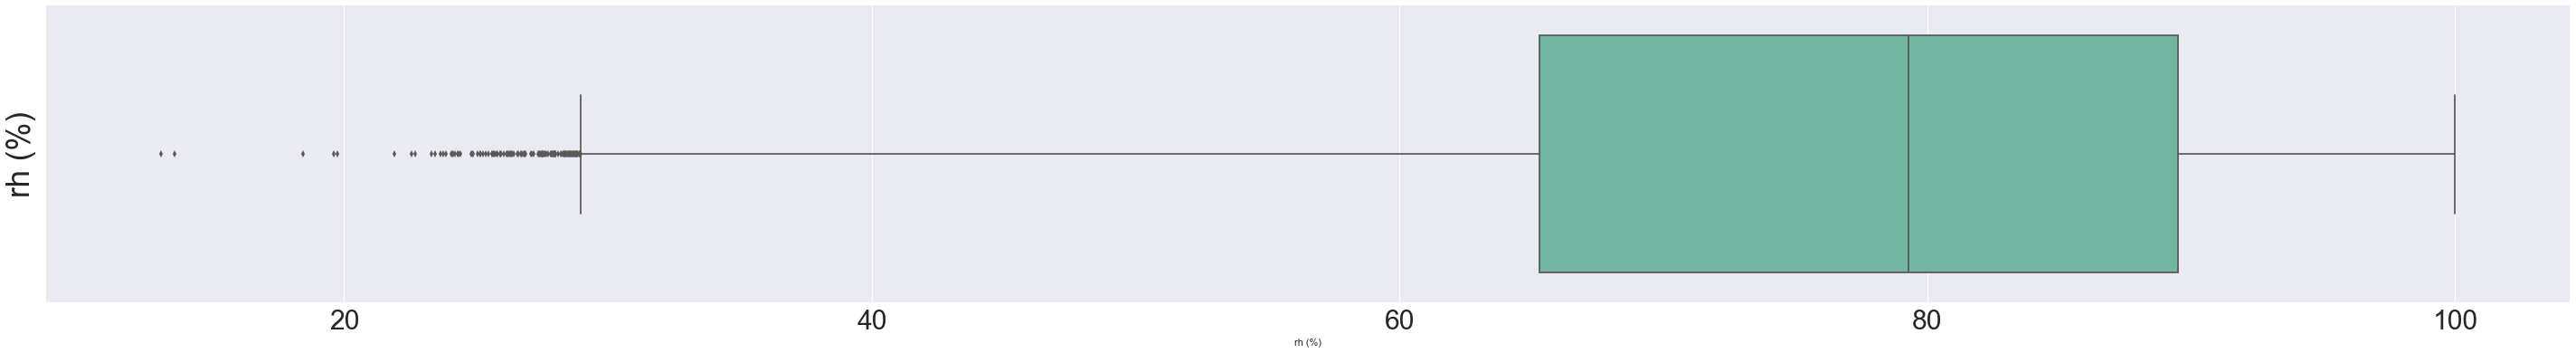

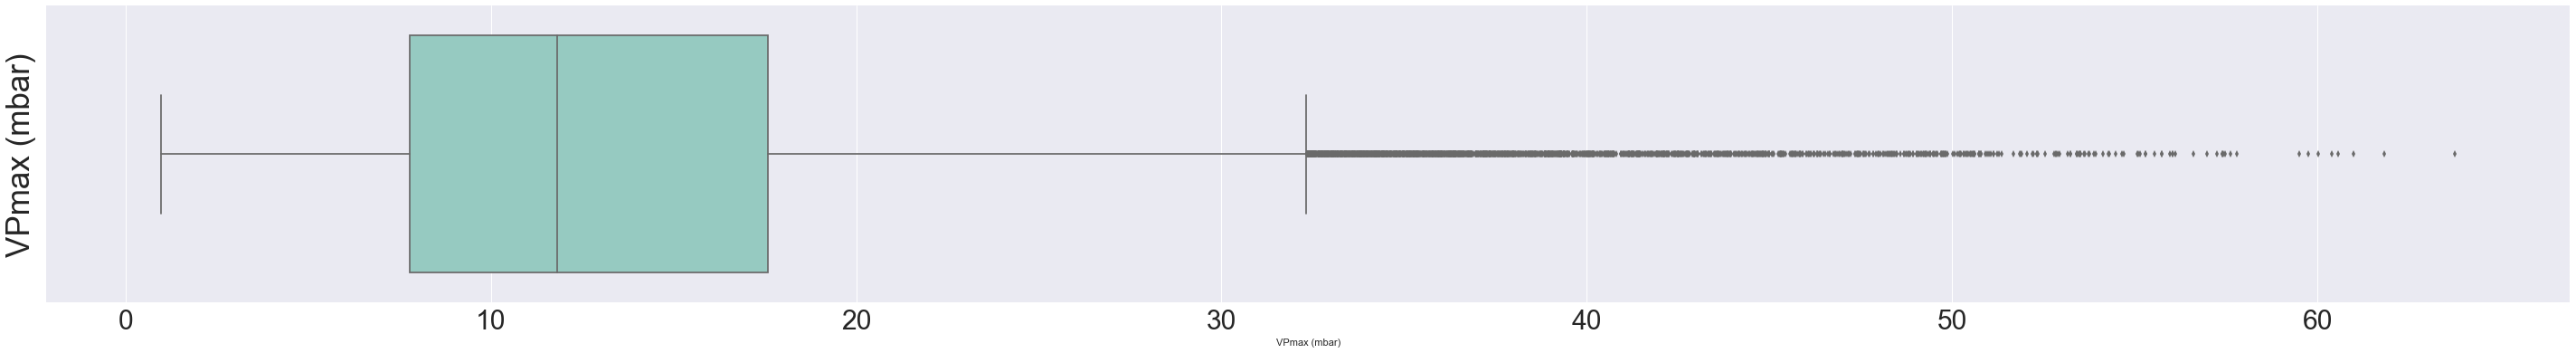

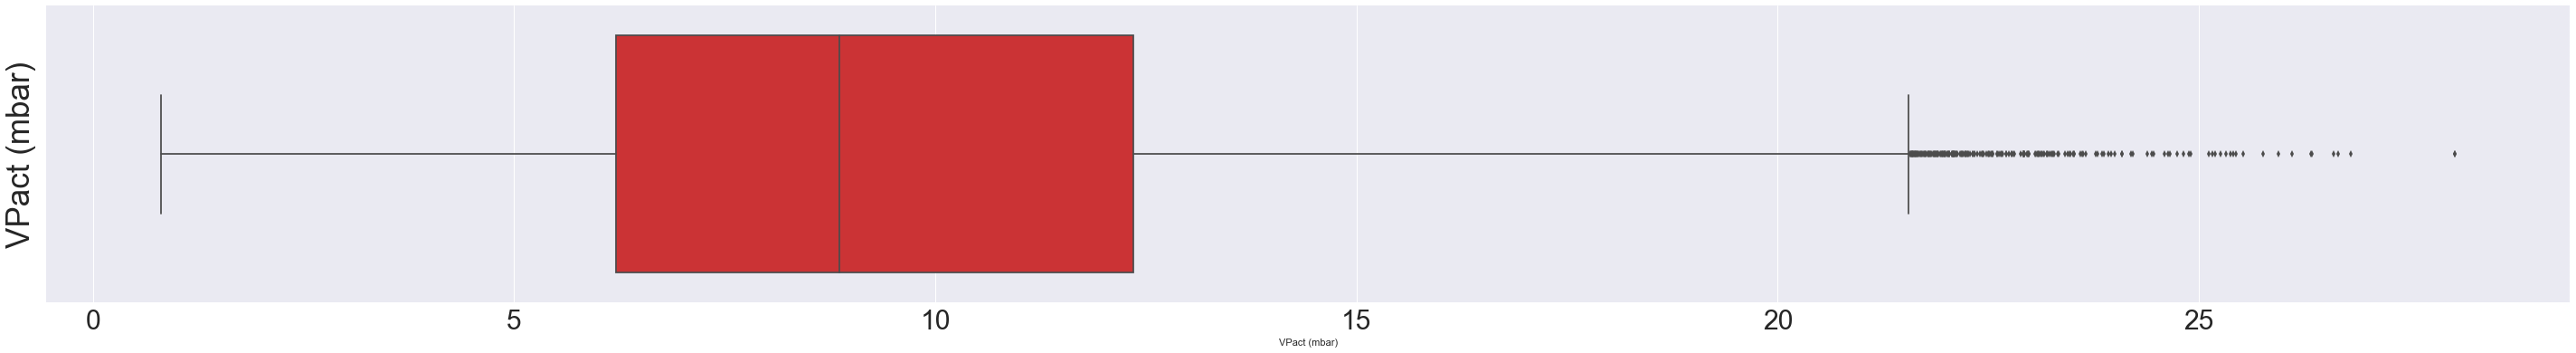

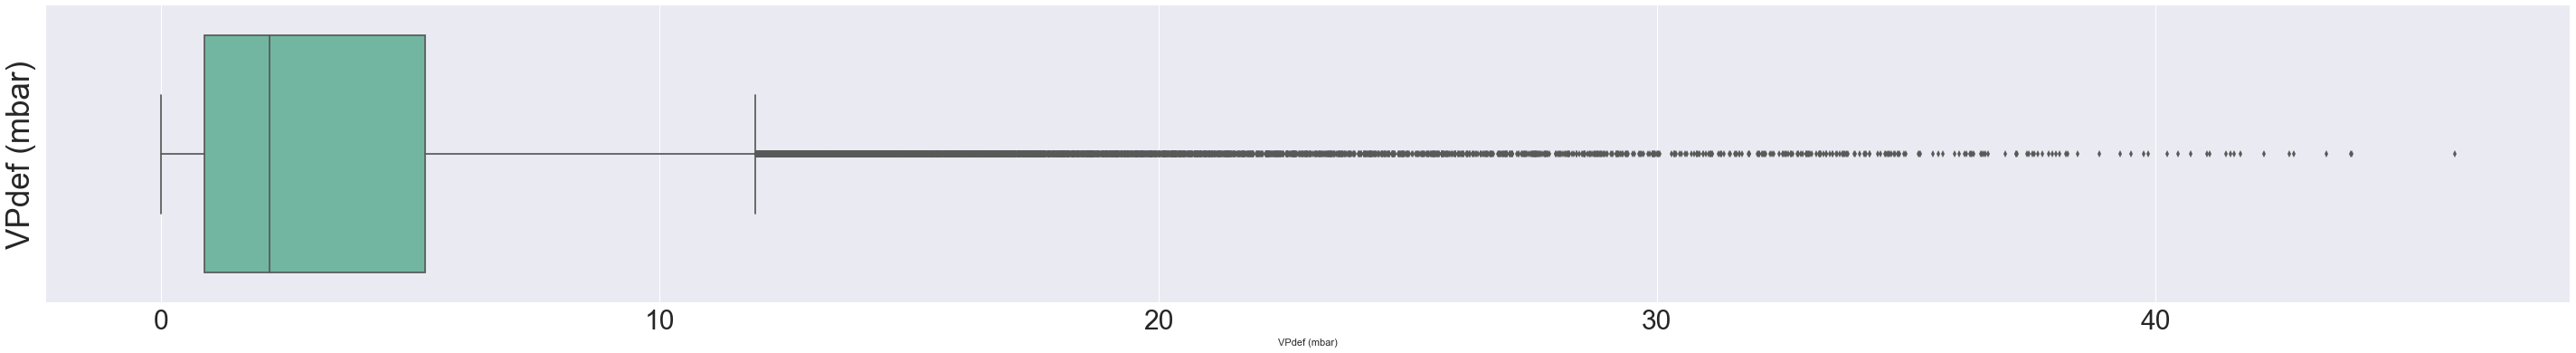

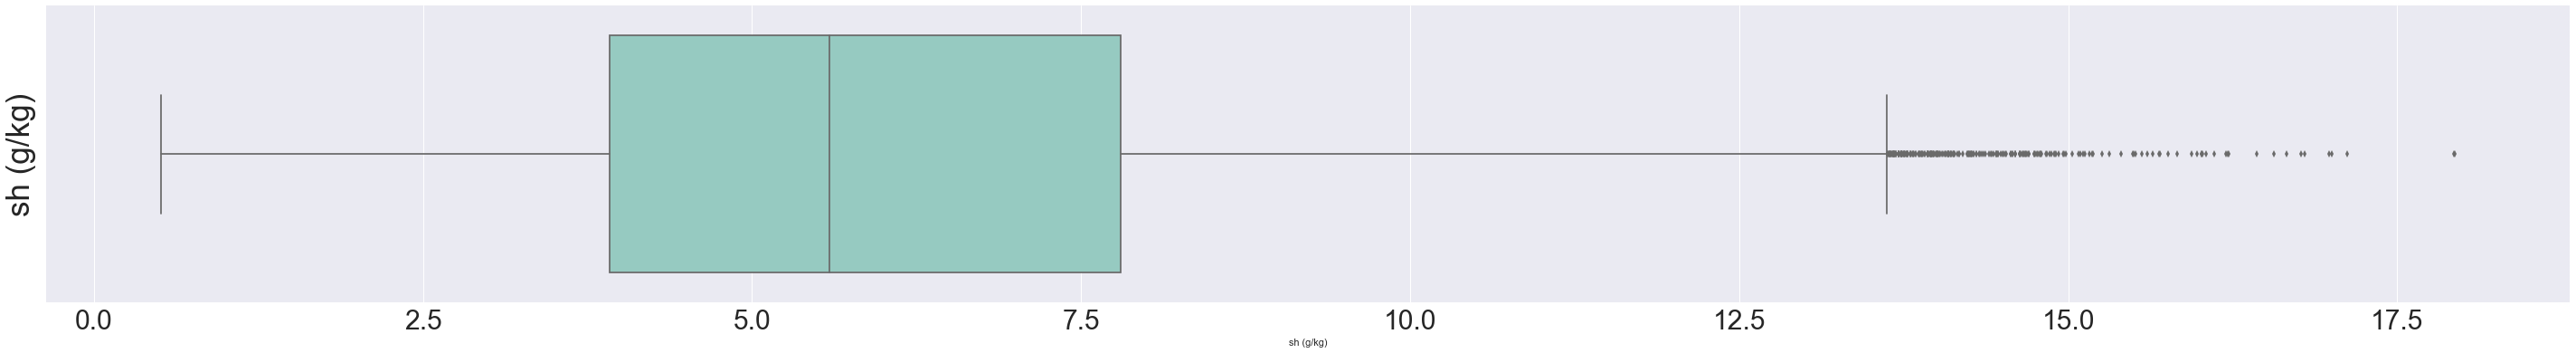

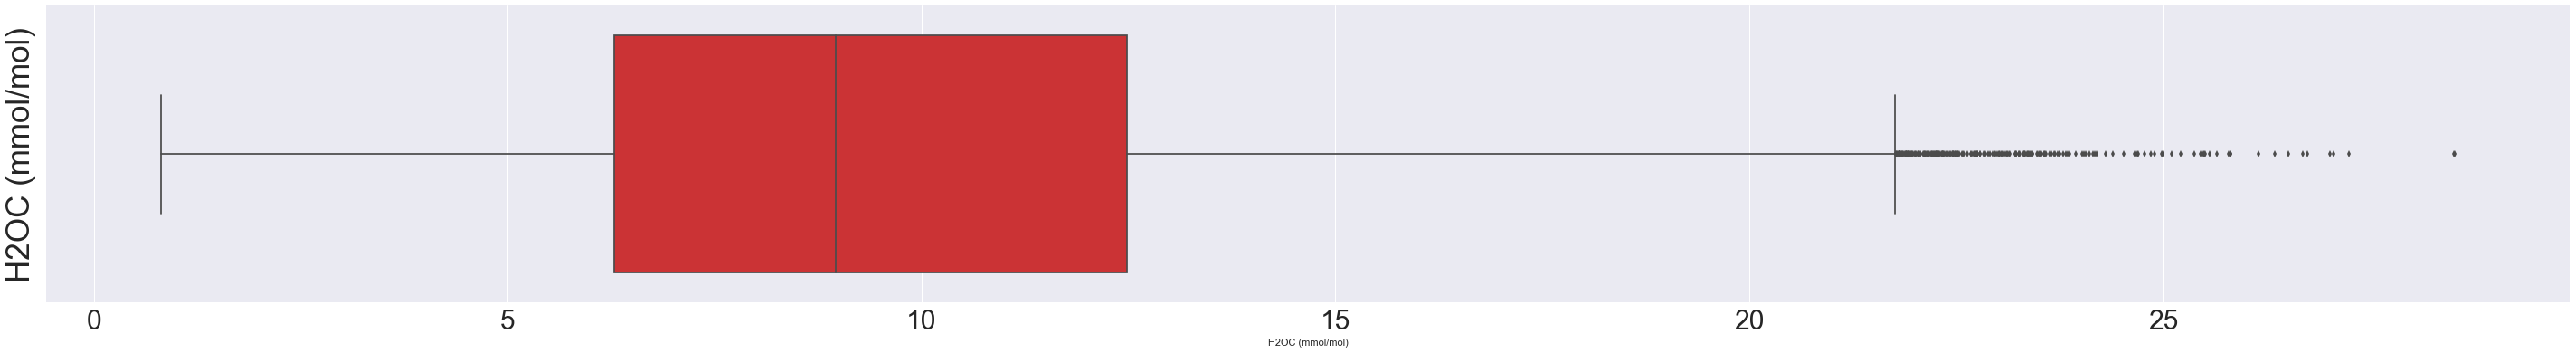

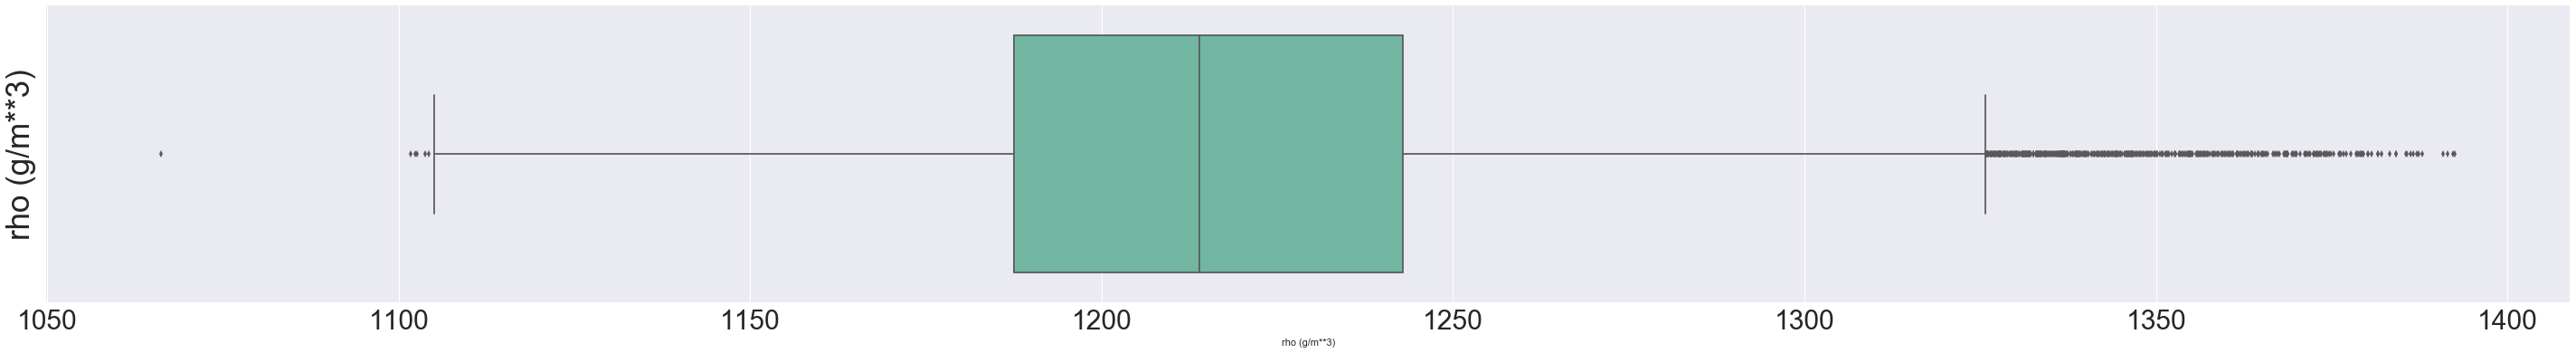

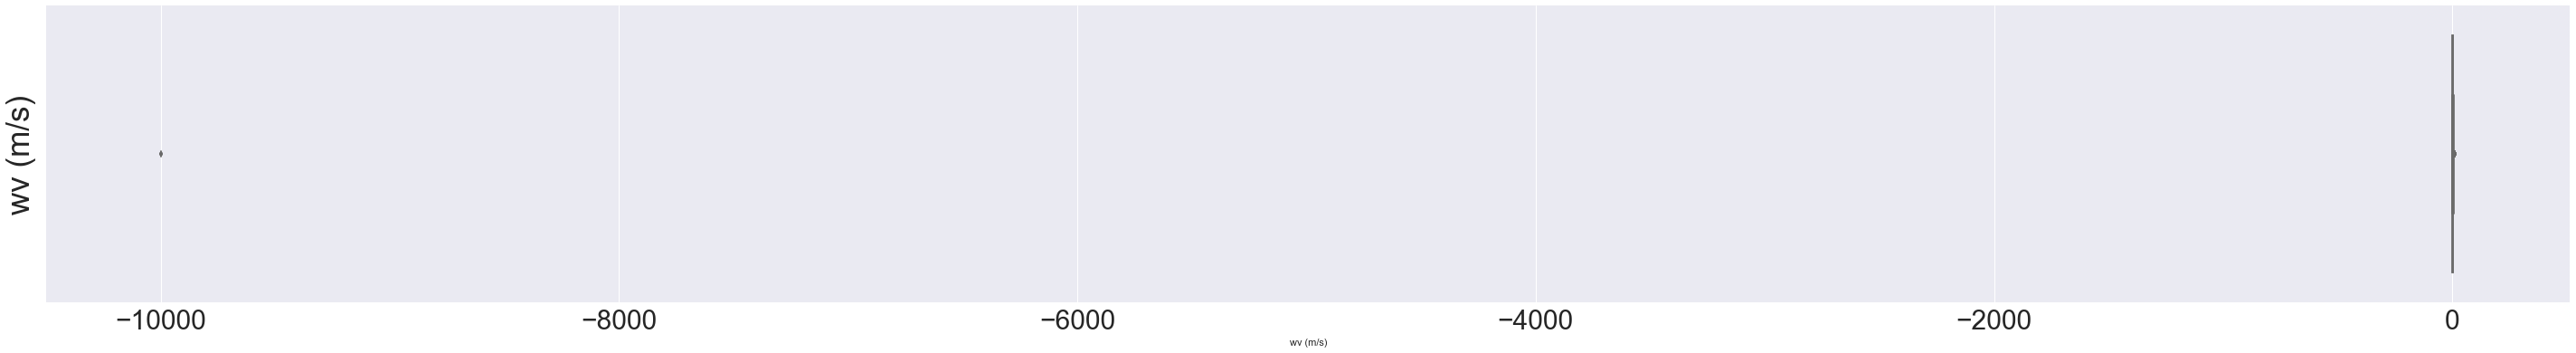

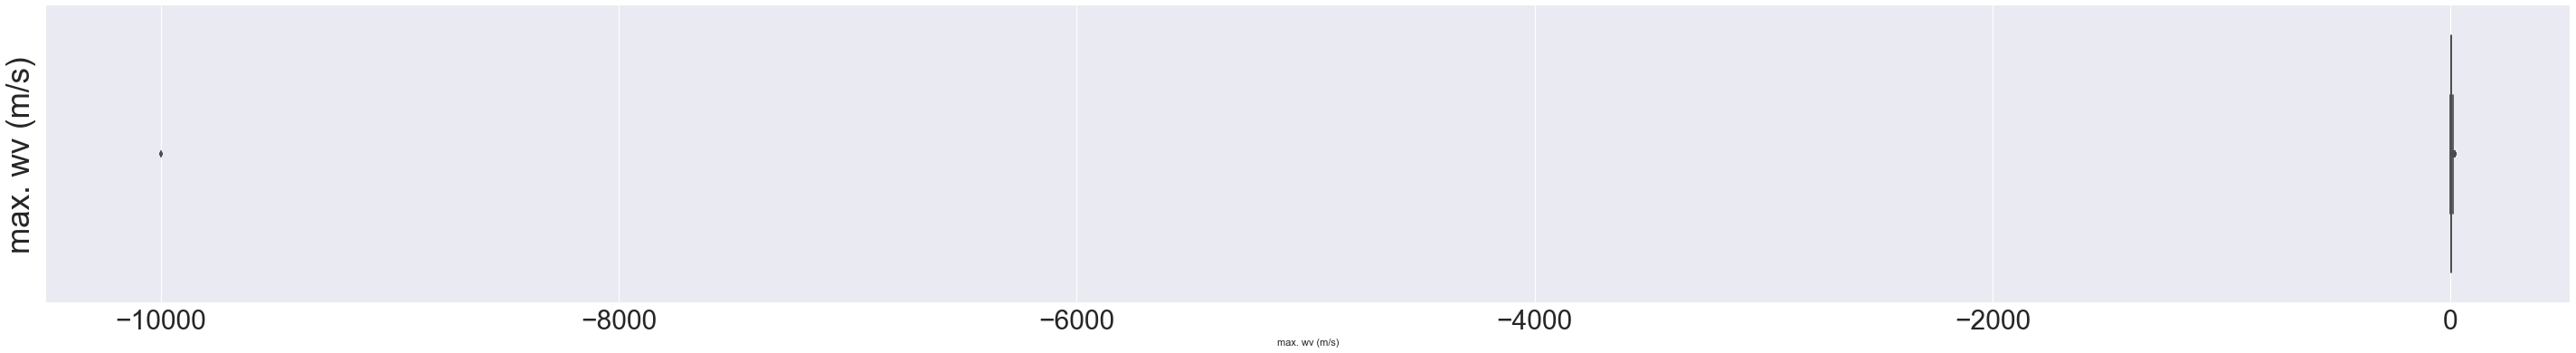

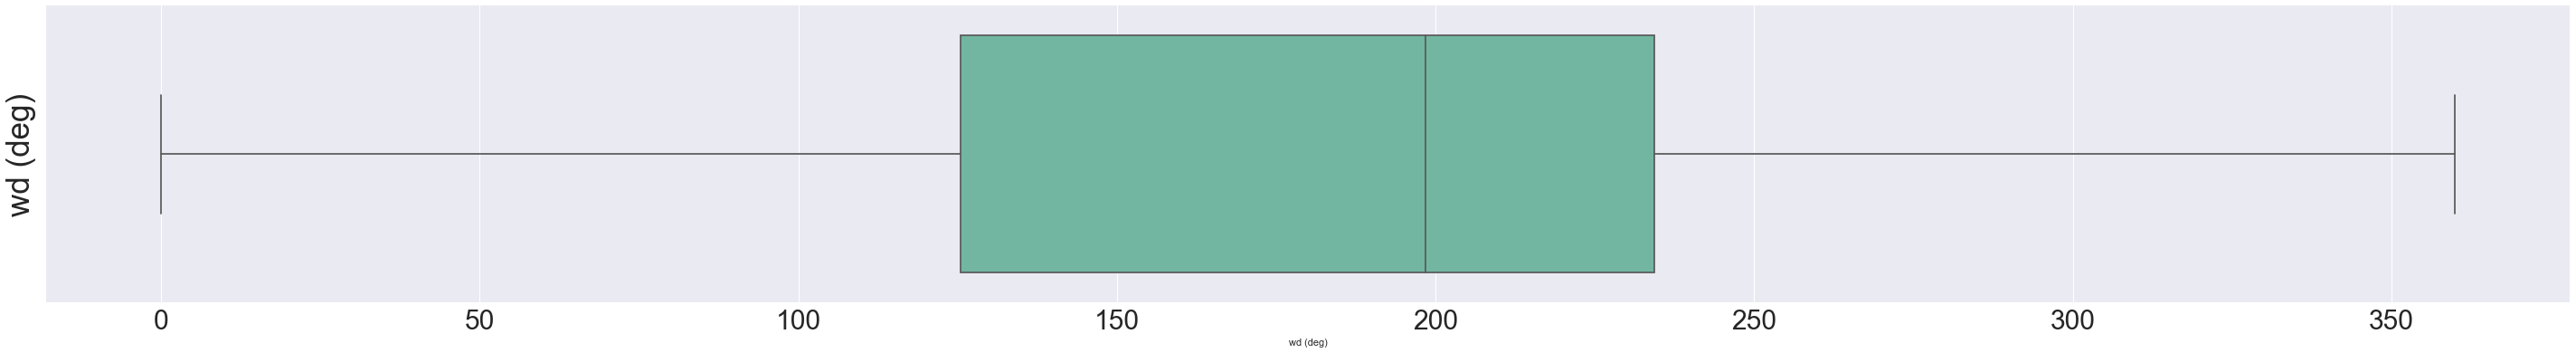

In [9]:

for i,col in enumerate(edaDf.columns):
    plt.figure(figsize=(50,100))
    plt.subplot(14,1,i+1)
    sns.boxplot(x=col,data=edaDf, orient="h", palette="Set"+str(i%3+1))
    plt.ylabel(col, fontsize=35)
    plt.tick_params(labelsize=30)
    plt.show()

### Bollinger band

- This plot shows that the actual target value (T DegC) mostly falls within three times 96 windows standard deviation upper and lower bound (i.e. Blue and Green)

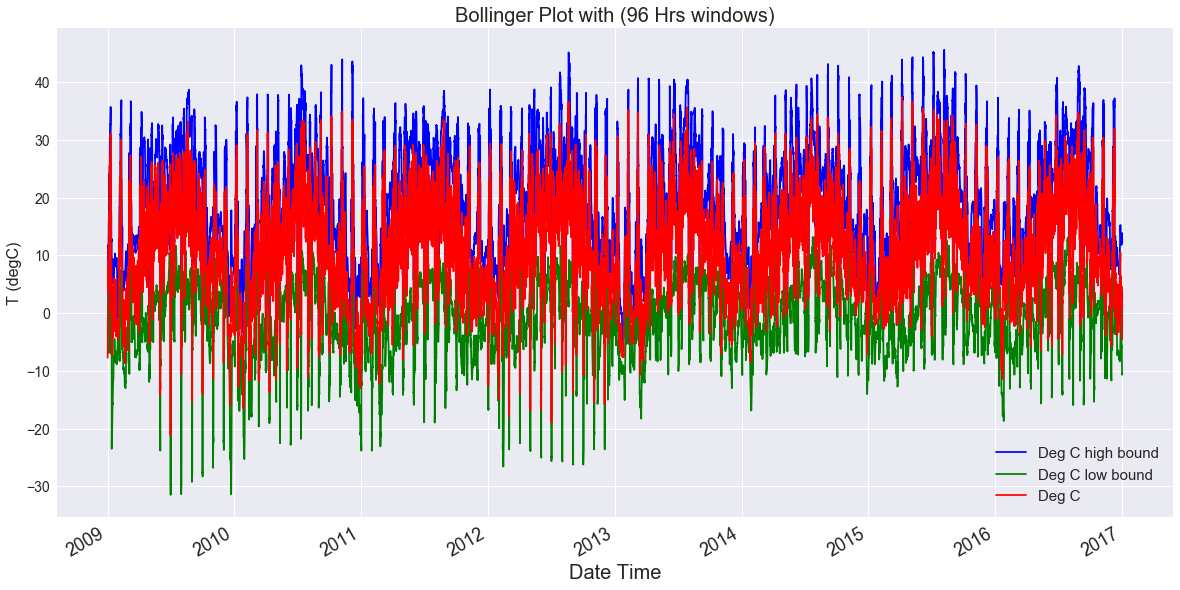

In [45]:
bol_low_df = edaDf.rolling(96).mean() - (edaDf.rolling(96).std()*3) #Calculate rolling mean + 3x rolling std 
bol_high_df = edaDf.rolling(96).mean() + (edaDf.rolling(96).std()*3) #Calculate rolling mean - 3x rolling std 
plt.figure(figsize=(20,10))
#Plot upper-bound, lower-bound and actual T(degC) values
bol_high_df["T (degC)"].plot(color="blue")
bol_low_df["T (degC)"].plot(color="green")
bol_df["T (degC)"].plot(color="red")
plt.legend(("Deg C high bound","Deg C low bound", "Deg C"), fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Bollinger Plot with (96 Hrs windows)", fontsize=20)
plt.xlabel("Date Time", fontsize=20)
plt.ylabel("T (degC)", fontsize=16)
plt.show()

# III. Data Normalization and Transformation

### ReLoad dataset for Prediction

In [10]:
df = pd.read_csv("./data/climate_hour.csv")

In [11]:
df["Date Time"]= df["Date Time"].map(lambda x: str(x).replace(" ","_"))
df.head(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009_02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009_03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2


### Split the Train and Test Data

In [12]:
x_train_last_index =df.index[df["Date Time"] == "31.12.2014_22:00:00"][0]
x_train = df.loc[:x_train_last_index]
display(x_train.head(3))
display(x_train.tail(3))

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009_02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009_03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52562,31.12.2014_20:00:00,1006.28,2.14,274.81,1.89,98.2,7.13,7.00,0.13,4.34,6.96,1269.97,0.68,1.68,119.3
52563,31.12.2014_21:00:00,1006.69,1.96,274.60,1.72,98.3,7.04,6.92,0.12,4.29,6.87,1271.36,0.67,1.56,145.3
52564,31.12.2014_22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.10,4.29,6.88,1271.74,0.71,1.80,129.6


In [13]:
x_test_start_index =df.index[df["Date Time"] == "31.12.2014_00:00:00"][0]
x_test= df.loc[x_test_start_index:]
x_test=x_test.iloc[:-1]
display(x_test.head(3))
display(x_test.tail(3))

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52542,31.12.2014_00:00:00,1004.60,1.53,274.33,0.08,90.0,6.82,6.14,0.68,3.81,6.11,1271.08,2.12,3.47,260.7
52543,31.12.2014_01:00:00,1004.32,1.43,274.25,-0.39,87.6,6.78,5.94,0.84,3.68,5.91,1271.29,2.89,4.11,251.3
52544,31.12.2014_02:00:00,1004.26,1.59,274.41,-0.52,85.8,6.85,5.88,0.97,3.65,5.85,1270.51,2.93,4.37,257.0


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
70033,31.12.2016_21:00:00,1001.29,-3.09,269.98,-7.09,73.7,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
70034,31.12.2016_22:00:00,1000.70,-2.59,270.51,-7.04,71.3,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15
70035,31.12.2016_23:00:00,1000.21,-3.76,269.39,-7.95,72.5,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70


### Turn dataframe to array (Compare with provided data format)

In [14]:
timestep = 24

arr_train = np.array(x_train.iloc[:,1:])
arr_test = np.array(x_test.iloc[:,1:])

In [15]:
timestep=24
reshape_length = timestep * arr_train.shape[1]
lst=[]
for i in range(arr_train.shape[0]-timestep+1):
    arr=arr_train[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_train=np.array(lst)
print(arr_train.shape)
display(arr_train[:3])
display(arr_train[-3:])

(52542, 336)


array([[ 9.9650e+02, -8.0500e+00,  2.6538e+02, ...,  4.1000e-01,
         8.8000e-01,  1.5500e+02],
       [ 9.9662e+02, -8.8800e+00,  2.6454e+02, ...,  2.8000e-01,
         1.0000e+00,  1.4810e+02],
       [ 9.9684e+02, -8.8100e+00,  2.6459e+02, ...,  4.9000e-01,
         8.8000e-01,  2.0980e+02]])

array([[1.00446e+03, 1.53000e+00, 2.74340e+02, ..., 6.80000e-01,
        1.68000e+00, 1.19300e+02],
       [1.00423e+03, 1.46000e+00, 2.74290e+02, ..., 6.70000e-01,
        1.56000e+00, 1.45300e+02],
       [1.00440e+03, 1.47000e+00, 2.74280e+02, ..., 7.10000e-01,
        1.80000e+00, 1.29600e+02]])

In [16]:
timestep=24
reshape_length = timestep * arr_test.shape[1]
lst=[]
for i in range(arr_test.shape[0]-timestep+1):
    arr=arr_test[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_test=np.array(lst)
print(arr_test.shape)
display(arr_test[:3])
display(arr_test[-3:])

(17471, 336)


array([[1.00460e+03, 1.53000e+00, 2.74330e+02, ..., 3.50000e-01,
        8.60000e-01, 1.40800e+02],
       [1.00432e+03, 1.43000e+00, 2.74250e+02, ..., 4.10000e-01,
        9.20000e-01, 2.73800e+02],
       [1.00426e+03, 1.59000e+00, 2.74410e+02, ..., 4.30000e-01,
        8.80000e-01, 1.19100e+02]])

array([[ 1.00893e+03, -2.63000e+00,  2.69840e+02, ...,  6.10000e-01,
         1.48000e+00,  2.07500e+02],
       [ 1.00882e+03, -2.98000e+00,  2.69500e+02, ...,  3.80000e-01,
         7.20000e-01,  8.15000e+00],
       [ 1.00867e+03, -4.09000e+00,  2.68410e+02, ...,  8.90000e-01,
         1.30000e+00,  2.23700e+02]])

### Transform Target prediction values to Time Series format

In [17]:
timestep=24
y_train = np.array(df.iloc[timestep: timestep + arr_train.shape[0]]["T (degC)"])
#y_train = y_train.reshape(y_train.shape[0],1)
display(y_train.shape)
display(y_train[:3])
display(y_train[-3:])

(52542,)

array([-4.44, -4.29, -4.45])

array([1.96, 1.94, 2.18])

In [18]:
x_test_start_index =df.index[df["Date Time"] == "31.12.2014_00:00:00"][0]
y_test= df.loc[x_test_start_index+timestep:]["T (degC)"]

display(y_test.shape)
display(y_test[:3])
display(y_test[-3:])

(17471,)

52566    2.06
52567    2.22
52568    2.04
Name: T (degC), dtype: float64

70034   -2.59
70035   -3.76
70036   -4.82
Name: T (degC), dtype: float64

### Normalization

In [19]:
df2=df.copy()
for i, colName in enumerate(df2.columns[1:]):
    df2[colName] = (df2[colName] - np.min(df2[colName])) /  (np.max(df2[colName]) - np.min(df2[colName]))
print(df2.shape)
df2.head(3)

(70037, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009_01:00:00,0.805868,0.245003,0.240722,0.335568,0.935588,0.037580,0.085567,0.004130,0.083190,0.084416,0.740479,0.998764,0.998034,0.535278
1,01.01.2009_02:00:00,0.807108,0.231179,0.226806,0.314830,0.921785,0.034236,0.076754,0.004564,0.074584,0.075758,0.753930,0.998768,0.998034,0.528611
2,01.01.2009_03:00:00,0.809381,0.232345,0.227634,0.317134,0.925236,0.034395,0.077855,0.004347,0.075731,0.076840,0.753715,0.998761,0.998034,0.464444


In [20]:
x_train_last_index =df2.index[df2["Date Time"] == "31.12.2014_22:00:00"][0]
x_train = df2.loc[:x_train_last_index]


x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
x_test= df2.loc[x_test_start_index:]
x_test=x_test.iloc[:-1]


In [21]:
timestep = 24

arr_train = np.array(x_train.iloc[:,1:])
arr_test = np.array(x_test.iloc[:,1:])

In [22]:
timestep=24
reshape_length = timestep * arr_train.shape[1]
lst=[]
for i in range(arr_train.shape[0]-timestep+1):
    arr=arr_train[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_train=np.array(lst)
print(arr_train.shape)
display(arr_train[:3])
display(arr_train[-3:])

(52542, 336)


array([[0.80586837, 0.24500333, 0.24072233, ..., 0.99878441, 0.99805875,
        0.43055556],
       [0.80710817, 0.23117921, 0.22680583, ..., 0.99877142, 0.99807073,
        0.41138889],
       [0.80938113, 0.2323451 , 0.22763419, ..., 0.9987924 , 0.99805875,
        0.58277778]])

array([[0.88810828, 0.40456362, 0.38916501, ..., 0.99881138, 0.9981386 ,
        0.33138889],
       [0.885732  , 0.40339773, 0.38833665, ..., 0.99881038, 0.99812662,
        0.40361111],
       [0.88748838, 0.40356429, 0.38817097, ..., 0.99881437, 0.99815057,
        0.36      ]])

In [23]:
timestep=24
reshape_length = timestep * arr_test.shape[1]
lst=[]
for i in range(arr_test.shape[0]-timestep+1):
    arr=arr_test[i:i+timestep]
    lst.append(arr.reshape(reshape_length))
arr_test=np.array(lst)
print(arr_test.shape)
display(arr_test[:3])
display(arr_test[-3:])

(17471, 336)


array([[0.88955471, 0.40456362, 0.38899934, ..., 0.99877841, 0.99805676,
        0.39111111],
       [0.88666185, 0.40289807, 0.38767396, ..., 0.99878441, 0.99806274,
        0.76055556],
       [0.88604195, 0.40556296, 0.39032472, ..., 0.99878641, 0.99805875,
        0.33083333]])

array([[0.93429073, 0.33527648, 0.31461233, ..., 0.99880438, 0.99811864,
        0.57638889],
       [0.93315425, 0.32944704, 0.30897946, ..., 0.99878141, 0.99804278,
        0.02263889],
       [0.9316045 , 0.31095936, 0.29092114, ..., 0.99883235, 0.99810067,
        0.62138889]])

### Transform to Time series format

In [24]:
n_feature=14 #Number features in every timestep
timestep = 24 #Number of timestep we going to use to predict the next value

print("2D Train",arr_train.shape, y_train.shape)
print("2D Test",arr_test.shape, y_test.shape)
print()
arr_train= np.reshape(arr_train, (arr_train.shape[0],timestep, n_feature))
arr_test= np.reshape(arr_test, (arr_test.shape[0],timestep, n_feature))
print("3D Train",arr_train.shape, y_train.shape)
print("3D Test",arr_test.shape, y_test.shape)

2D Train (52542, 336) (52542,)
2D Test (17471, 336) (17471,)

3D Train (52542, 24, 14) (52542,)
3D Test (17471, 24, 14) (17471,)


# IV. Modeling and Forecasting

### LSTM Modeling

In [32]:
import keras #Need to downgrade keras to 2.1.2 Version (pip install kera)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [122]:
#Stacked LSTM network
model = Sequential()
model.add(LSTM(16,activation="tanh",input_shape = (timestep, n_feature),return_sequences=True)) 
model.add(LSTM(16))
model.add(Dense(8, kernel_initializer="normal",activation="linear"))
model.add(Dense(1, kernel_initializer="normal",activation="linear"))


#To save the best model by monitor the "Validation Loss"
checkpoint = ModelCheckpoint(filepath="./model/best_mod.h5", 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
callbacks_list = [checkpoint]

model.compile(loss="mae", optimizer="adam")

batch_size = 200
no_epoch=1

#fit network
history = model.fit(arr_train, y_train, 
                    epochs=no_epoch, 
                    batch_size=batch_size,
                    #steps_per_epoch = step_per_epoch,
                    validation_data=(arr_test,y_test),
                   callbacks=callbacks_list)

#Save models in disk
model.save("./model/model_EP%s_b.h5"%(no_epoch))


#Save Model History (Loss vs Epoch)
epochs= np.linspace(1,no_epoch,no_epoch,dtype=int)
pd.DataFrame(list(zip(epochs,history.history["loss"],history.history["val_loss"])), \
             columns=["epoch", "loss","val_loss"]).to_csv("./model/history_EP%s"%(str(no_epoch)), )

NameError: name 'Sequential' is not defined

## Result Summary

In [ ]:
pd.read_csv("Result_Table.csv").replace("NaN", " ")

## Retrieve saved model

In [ ]:
batch_size=10
model = keras.models.load_model('./model_base_BS200_EP500_node8/best_mod.h5')
train_score = model.evaluate(arr_train, y_train, batch_size=batch_size*2, verbose=1)
test_score = model.evaluate(arr_test, y_test, batch_size=batch_size*2, verbose=1)
print("Train score:%0.3f, Test Score:%0.3f"%(train_score, test_score))
pred_temp=model.predict(arr_test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#print(pred_temp.shape)
pred_temp = pred_temp.flatten()

#x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
#date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

date_time=list(pd.to_datetime(list(map(lambda x:x.replace("_"," "), date_time))))
df=pd.DataFrame(list(zip(date_time,y_test,pred_temp)), columns=["date_time", "y_test","pred_temp"])
df.set_index("date_time", inplace=True)

plt.figure(figsize=(20,20))
df.plot(figsize=(20,10),subplots=True, fontsize=10)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
hist = pd.read_csv("./model_base_BS200_EP500_node8/history_EP500")
plt.figure(figsize=(10,5))
plt.plot("epoch","loss", data=hist)
plt.plot("epoch","val_loss", data=hist)
plt.title("Base Model_Batch Size(200)_Epoch(500)_Node(8)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Compare Prediction result 

#### Set 1: "LSTM(act)= tanh, Dense(act)=default,Batch_size=200, Epoch=500"

In [ ]:
hist1=pd.read_csv("./model_base_BS200_EP500_node8/history_EP500")
hist2=pd.read_csv("./model_base_BS200_EP500_node14/history_EP500")
hist3=pd.read_csv("./model_base_BS200_EP500_node32/history_EP500")

plt.figure(figsize=(20,7))
plt.suptitle("LSTM(act)= tanh, Dense(act)=default,Batch_size=200, Epoch=500", fontsize=25)

plt.subplot(1,3,1)
plt.boxplot(x=[hist1.loss, hist1.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.ylabel("Loss", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 8", fontsize=20)

plt.subplot(1,3,2)
plt.boxplot(x=[hist2.loss, hist2.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 14",fontsize=20)

plt.subplot(1,3,3)
plt.boxplot(x=[hist3.loss, hist3.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.35, 0.525)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 32",fontsize=20)

#plt.subplot(2,1,1)
histAll = pd.concat((hist1.epoch,
                     hist1.loss,hist1.val_loss,
                     hist2.loss,hist2.val_loss,
                     hist3.loss,hist3.val_loss), axis=1)
histAll.columns=["epoch","node8_loss", "node8_val_loss","node14_loss", "node14_val_loss","node32_loss", "node32_val_loss"]
histAll.plot(x="epoch", figsize=(20,5))
plt.ylim(0.35,0.7)
plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epoch", fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

#### Set2: "LSTM(act)= tanh, Dense(act)=default,Batch_size=200, Epoch=300, dropout=0.5"

In [ ]:
hist1=pd.read_csv("./model_base_BS200_EP300_node14_Drop0.5/history_EP300")
hist2=pd.read_csv("./model_base_BS200_EP300_node32_Drop0.5/history_EP300")

plt.figure(figsize=(20,7))
plt.suptitle("LSTM(act)= tanh, Dense(act)=default,Batch_size=200, Epoch=300, dropout=0.5", fontsize=25)

plt.subplot(1,2,1)
plt.boxplot(x=[hist1.loss, hist1.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0, 6)
plt.ylabel("Loss", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 14", fontsize=20)


plt.subplot(1,2,2)
plt.boxplot(x=[hist2.loss, hist2.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.3, 1.6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 32", fontsize=20)


#plt.subplot(2,1,1)
histAll = pd.concat((hist1.epoch,hist1.loss,hist1.val_loss,hist2.loss,hist2.val_loss), axis=1)
histAll.columns=["epoch","node14_loss", "node14_val_loss","node32_loss", "node32_val_loss"]
histAll.plot(x="epoch", figsize=(20,5))
plt.ylim(0.3,6)
plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epoch", fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

#### set 3: "LSTM(act)= tanh, Dense(act)=linear ,Batch_size=200, Epoch=300, Dense(kernel_initializer=normal)"

In [ ]:
hist1=pd.read_csv("./model_BS200_node8_tanh_linear/history_EP500")
hist2=pd.read_csv("./model_BS200_node16_tanh_linear/history_EP500")
hist3=pd.read_csv("./model_BS200_node32_tanh_linear/history_EP300")

plt.figure(figsize=(20,7))
plt.suptitle("LSTM(act)= tanh, Dense(act)=linear,Batch_size=200, Epoch=500, Dense(kernel_initializer=normal)", fontsize=25)

plt.subplot(1,3,1)
plt.boxplot(x=[hist1.loss, hist1.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.ylabel("Loss", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 8", fontsize=20)

plt.subplot(1,3,2)
plt.boxplot(x=[hist2.loss, hist2.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 16",fontsize=20)

plt.subplot(1,3,3)
plt.boxplot(x=[hist3.loss, hist3.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(6.6, 7)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("node = 32",fontsize=20)


histAll = pd.concat((hist1.epoch,
                     hist1.loss,hist1.val_loss,
                     hist2.loss,hist2.val_loss,
                     hist3.loss,hist3.val_loss), axis=1)
histAll.columns=["epoch","node8_loss", "node8_val_loss",
                 "node16_loss", "node16_val_loss",
                 "node32_loss", "node32_val_loss"]
histAll.plot(x="epoch", figsize=(20,5))
#plt.ylim(0.35,0.7)
plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epoch", fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

#### set 4: "LSTM(act)= tanh, Dense(act)=linear, nodes=16 , Epoch=300, Dense(kernel_initializer=normal)"

In [ ]:
hist1=pd.read_csv("./model_BS200_node8_tanh_linear/history_EP500")
hist2=pd.read_csv("./model_BS100_EP300_node16_tanh_linear/history_EP300")
hist3=pd.read_csv("./model_BS50_EP300_node16_tanh_linear/history_EP400")

plt.figure(figsize=(20,7))
plt.suptitle("LSTM(act)= tanh, Dense(act)=linear, nodes=16 , Epoch=300, Dense(kernel_initializer=normal)", fontsize=25)

plt.subplot(1,3,1)
plt.boxplot(x=[hist1.loss, hist1.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.ylabel("Loss", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Batch size = 200", fontsize=20)

plt.subplot(1,3,2)
plt.boxplot(x=[hist2.loss, hist2.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Batch size = 100",fontsize=20)

plt.subplot(1,3,3)
plt.boxplot(x=[hist3.loss, hist3.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.425, 0.525)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Batch size = 50",fontsize=20)


histAll = pd.concat((hist1.epoch,
                     hist1.loss,hist1.val_loss,
                     hist2.loss,hist2.val_loss,
                     hist3.loss,hist3.val_loss), axis=1)
histAll.columns=["epoch","node8_loss", "node8_val_loss",
                 "node16_loss", "node16_val_loss",
                 "node32_loss", "node32_val_loss"]
histAll.plot(x="epoch", figsize=(20,5))
plt.ylim(0.41,0.7)
plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epoch", fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

#### set 5: "LSTM(act)= tanh, Dense(act)=linear, nodes=16 ,Batch size=200 Epoch=1000, Dense(kernel_initializer=normal)"

In [ ]:
hist1=pd.read_csv("./model_BS200_EP1000_node16_tanh_linear/history_EP1000")

plt.figure(figsize=(20,7))
plt.suptitle("LSTM(act)= tanh, Dense(act)=linear, nodes=16 , Epoch=300, Dense(kernel_initializer=normal)", fontsize=25)

plt.subplot(1,2,1)
plt.boxplot(x=[hist1.loss, hist1.val_loss], widths=(0.5,0.5), labels=["train_loss","val_loss"])
plt.ylim(0.42, 0.5)
plt.ylabel("Loss", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Batch size = 200", fontsize=20)



hist1.plot(x="epoch", y=["loss", "val_loss"], figsize=(20,5))
plt.ylim(0.41,0.7)
plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epoch", fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Retrieve saved Best model

In [ ]:
batch_size=10
model = keras.models.load_model('./model_BS200_EP1000_node16_tanh_linear/best_mod.h5')
train_score = model.evaluate(arr_train, y_train, batch_size=batch_size*2, verbose=1)
test_score = model.evaluate(arr_test, y_test, batch_size=batch_size*2, verbose=1)
print("Train score:%0.3f, Test Score:%0.3f"%(train_score, test_score))
pred_temp=model.predict(arr_test)

In [ ]:
model.summary()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#print(pred_temp.shape)
pred_temp = pred_temp.flatten()

#x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
#date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]

date_time=list(pd.to_datetime(list(map(lambda x:x.replace("_"," "), date_time))))
df=pd.DataFrame(list(zip(date_time,y_test,pred_temp)), columns=["date_time", "y_test","pred_temp"])
df.set_index("date_time", inplace=True)

#plt.figure(figsize=(20,20))
df.plot(figsize=(20,10), fontsize=15)
plt.xlabel("Date Time", fontsize=18)
plt.ylabel("Deg C", fontsize=18)
plt.legend(fontsize=18)
plt.title("Temperature Plot (Actual vs Predicted)", fontsize = 22)
plt.show()

## Print to Kaggle submission

In [ ]:
#print(pred_temp.shape)
pred_temp = pred_temp.flatten()

x_test_start_index =df2.index[df2["Date Time"] == "31.12.2014_00:00:00"][0]
date_time= df2.loc[x_test_start_index+timestep:]["Date Time"]


pred_df = pd.DataFrame(list(zip(date_time,pred_temp)), columns= ["date_time", "temperature"])
pred_df.to_csv("./submission/submit3.csv", index=False)

In [ ]:
pd.read_csv("./submission/submit3.csv" ).head(3)